In [8]:
import torch, pdb
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
!pip install torch
!pip install torchvision



In [33]:
#visualization function
def show(tensor, ch=1, size=(28,28), num=16):
  #tensor: 128 x 784
  data=tensor.detach().cpu().view(-1,ch,*size)
  grid = make_grid(data[:num], nrow=4).permute(1,2,0)
  plt.imshow(grid)
  plt.show()

In [34]:
#setup of the main parameters and hyperparameters
epochs = 500
cur_step = 0
info_step = 300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim = 64
#learning rithm
lr = 0.00001
loss_func = nn.BCEWithLogitsLoss()

#batch size
bs = 128
device = 'cuda'

dataloader = DataLoader(MNIST('.', download=True, transform=transforms.ToTensor()), shuffle=True, batch_size=bs)
#number of steps = 60000/128 = 468.75 (number of images)


In [50]:
#declare our models

#Generator
def genBlock(inp, out):
  return nn.Sequential(
      nn.Linear(inp, out),
      nn.BatchNorm1d(out),
      nn.ReLU(inplace=True)
  )
class Generator(nn.Module):
  def __init__(self, z_dim=64, i_dim=784, h_dim=128):
    super().__init__()
    self.gen = nn.Sequential(
        genBlock(z_dim, h_dim), #64, 128
        genBlock(h_dim, h_dim*2), #128, 256
        genBlock(h_dim*2, h_dim*4), # 256, 516
        genBlock(h_dim*4, h_dim*8), #512, 1024
        nn.Linear(h_dim*8, i_dim), # 1024, 784 (28*28)
        nn.Sigmoid(),
    )

  def forward(self, noise):
      return self.gen(noise)

def gen_noise(number, z_dim):
  return torch.randn(number, z_dim).to(device)

##Discriminator

def discBlock(inp, out):
  return nn.Sequential(
      nn.Linear(inp, out),
      nn.LeakyReLU(0.2)
  )

class Discriminator(nn.Module):
  def __init__(self, i_dim=784, h_dim=256):
    super().__init__()
    self.disc=nn.Sequential(
        discBlock(i_dim, h_dim*4),   #784, 1024
        discBlock(h_dim*4, h_dim*2), #1024 - 512
        discBlock(h_dim*2, h_dim),   #512 - 256
        nn.Linear(h_dim, 1)          #256 - 1
    )

  def forward(self, image):
      return self.disc(image)


In [51]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)


torch.Size([128, 1, 28, 28]) torch.Size([128])
tensor([5, 6, 5, 1, 9, 2, 5, 6, 8, 4])


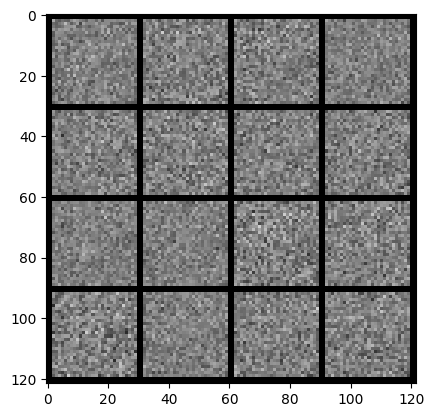

In [52]:
x,y=next(iter(dataloader))
print(x.shape, y.shape)
print(y[:10])

noise = gen_noise(bs, z_dim)
fake = gen(noise)
show(fake)

In [55]:
#calculating the loss

#generator loss
def calc_gen_loss(loss_func, gen, disc, number, z_dim):
  noise = gen_noise(number, z_dim)
  fake = gen(noise)
  prediction = disc(fake)
  targets=torch.ones_like(prediction)
  gen_loss=loss_func(prediction,targets)
  return gen_loss


def calc_disc_loss(loss_func, gen, disc, number, real, z_dim):
  noise = gen_noise(number, z_dim)
  fake = gen(noise)
  disc_fake = disc(fake.detach())
  disc_fake_targets=torch.zeros_like(disc_fake)
  disc_fake_loss=loss_func(disc_fake, disc_fake_targets)

  disc_real = disc(real)
  disc_real_targets=torch.ones_like(disc_real)
  disc_real_loss=loss_func(disc_real, disc_real_targets)

  disc_loss=(disc_fake_loss+disc_real_loss)/2

  return disc_loss

  0%|          | 0/469 [00:00<?, ?it/s]

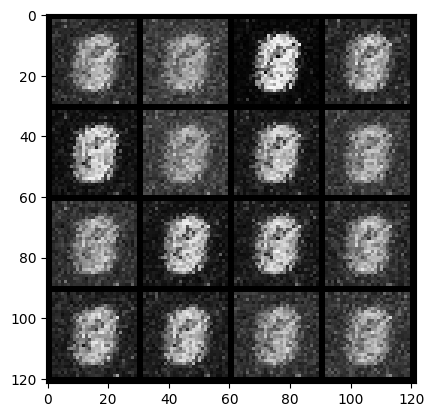

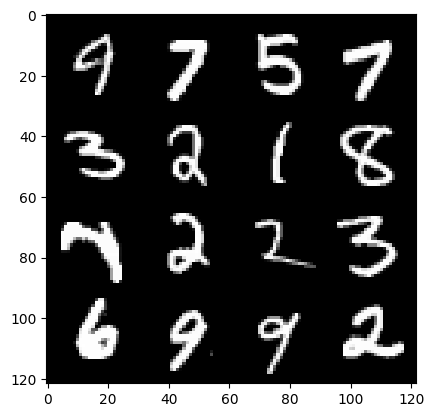

0: step 300 / Gen loss: 1.9926335028807323 / disc_loss: 0.3344472091645001


  0%|          | 0/469 [00:00<?, ?it/s]

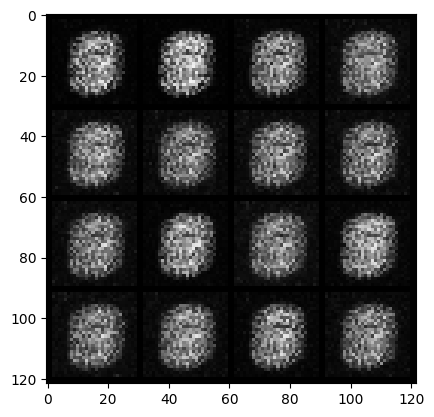

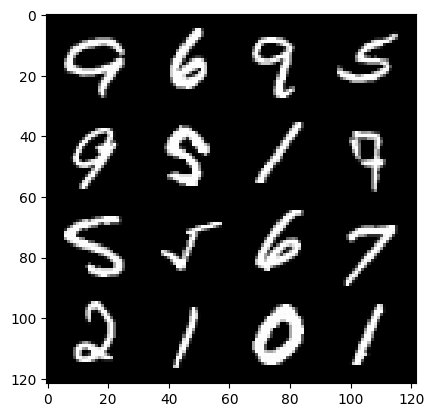

1: step 600 / Gen loss: 3.607930929660797 / disc_loss: 0.11626936823129663


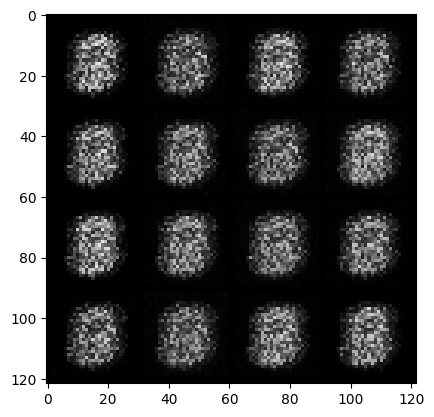

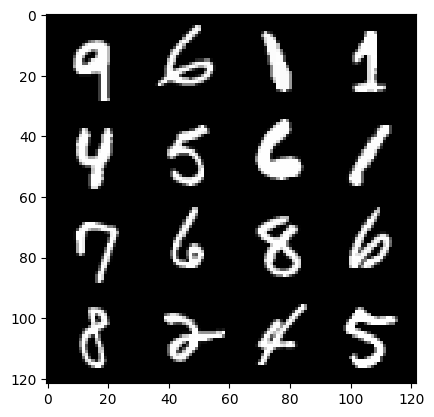

1: step 900 / Gen loss: 3.5399823196729026 / disc_loss: 0.0533124502996603


  0%|          | 0/469 [00:00<?, ?it/s]

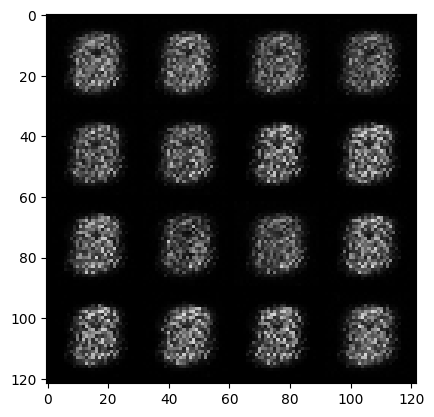

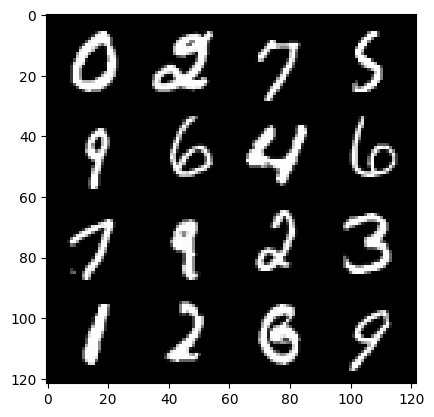

2: step 1200 / Gen loss: 3.581276609102886 / disc_loss: 0.03597825400531293


  0%|          | 0/469 [00:00<?, ?it/s]

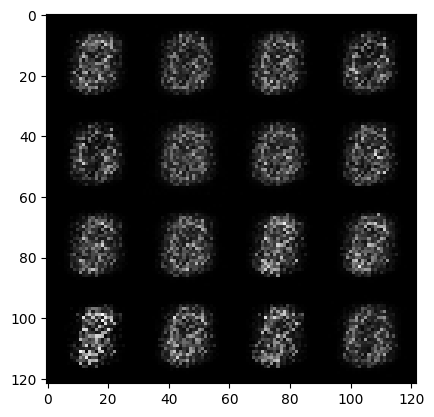

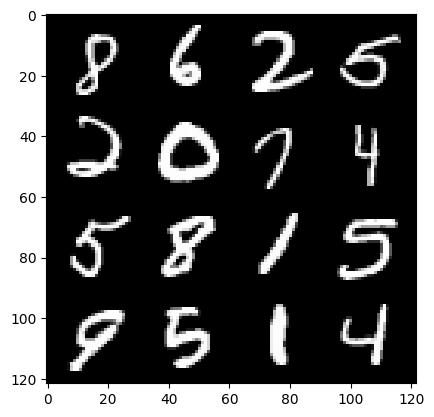

3: step 1500 / Gen loss: 3.4809342543284107 / disc_loss: 0.04056633159518243


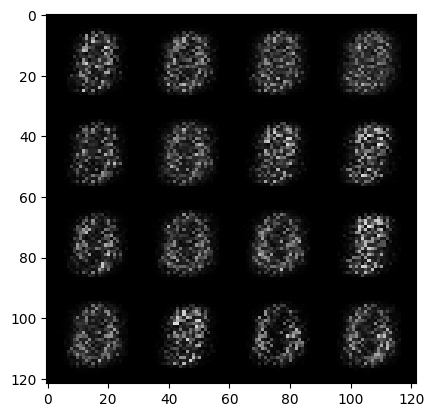

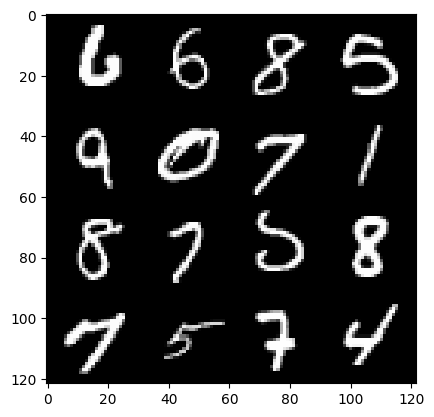

3: step 1800 / Gen loss: 3.50896030584971 / disc_loss: 0.0429889998274545


  0%|          | 0/469 [00:00<?, ?it/s]

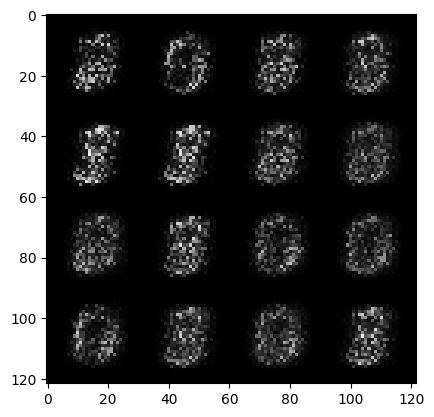

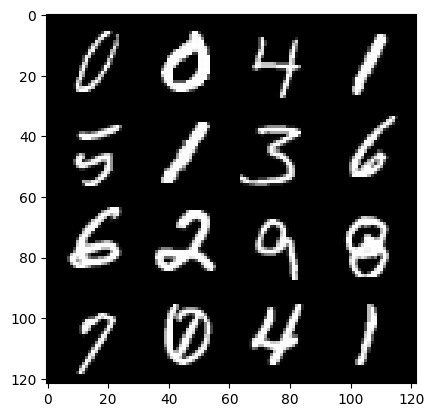

4: step 2100 / Gen loss: 3.878589110374452 / disc_loss: 0.033127472214400766


  0%|          | 0/469 [00:00<?, ?it/s]

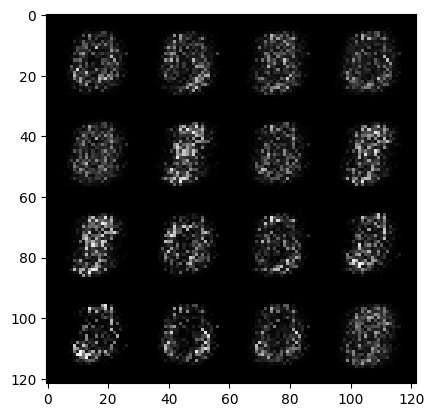

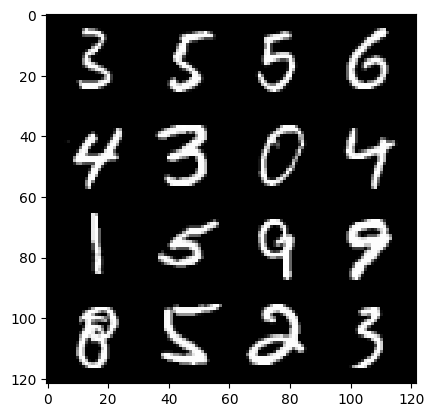

5: step 2400 / Gen loss: 4.160508255163826 / disc_loss: 0.03023042046775422


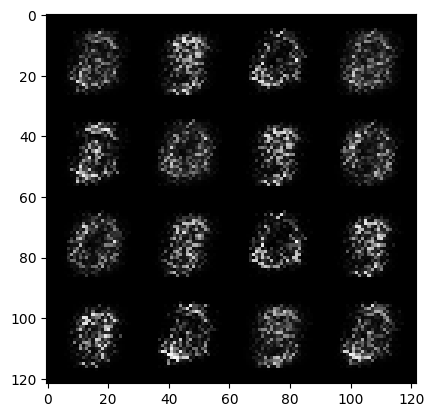

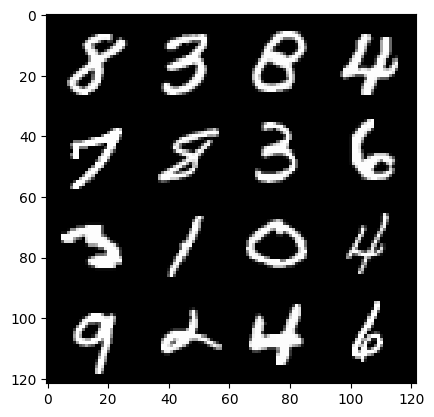

5: step 2700 / Gen loss: 4.50749635537465 / disc_loss: 0.02490396119964619


  0%|          | 0/469 [00:00<?, ?it/s]

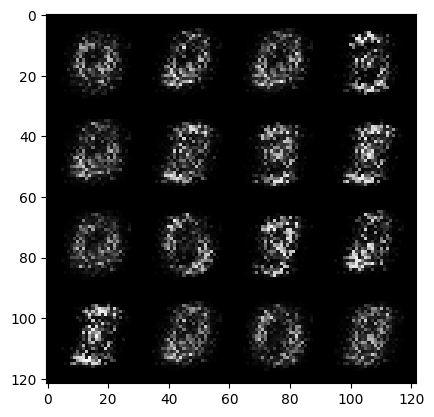

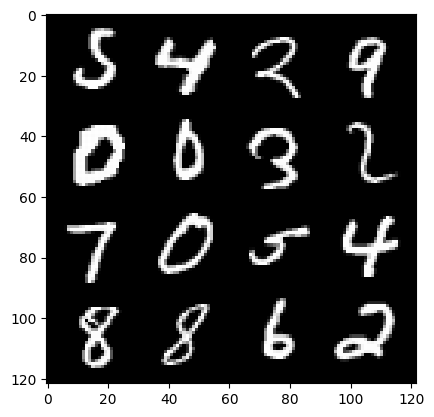

6: step 3000 / Gen loss: 4.815352694193519 / disc_loss: 0.023162379780163354


  0%|          | 0/469 [00:00<?, ?it/s]

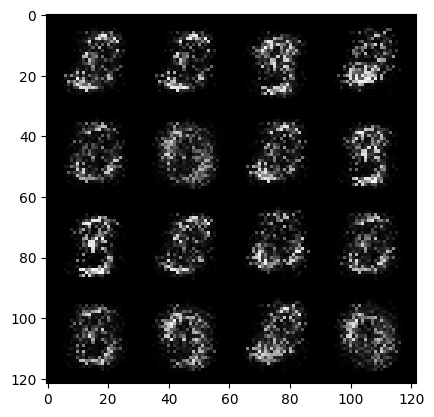

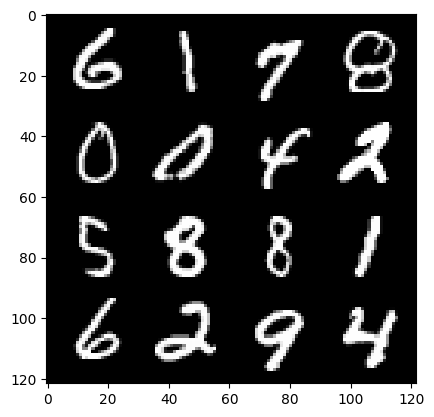

7: step 3300 / Gen loss: 5.192083436648052 / disc_loss: 0.023996313534056138


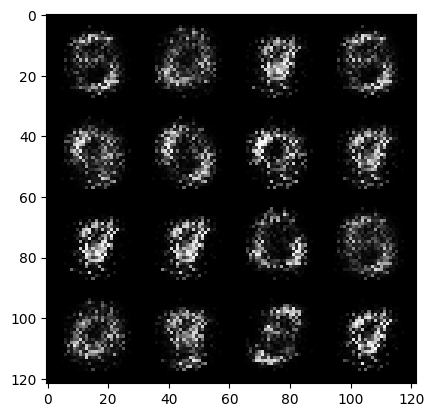

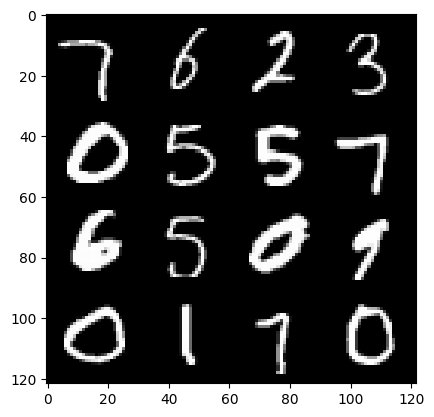

7: step 3600 / Gen loss: 5.519874650637308 / disc_loss: 0.022262456637496774


  0%|          | 0/469 [00:00<?, ?it/s]

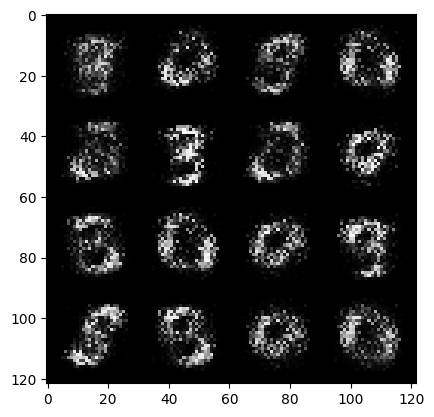

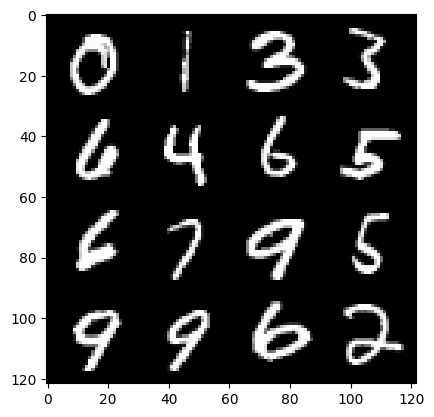

8: step 3900 / Gen loss: 5.623369854291278 / disc_loss: 0.02134631671011447


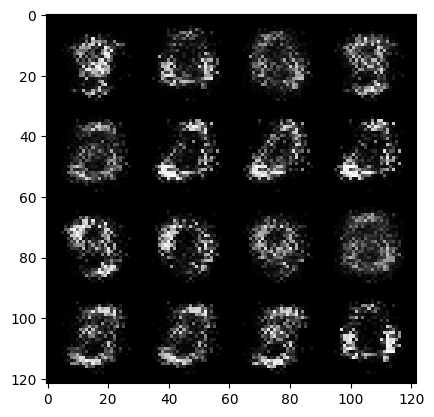

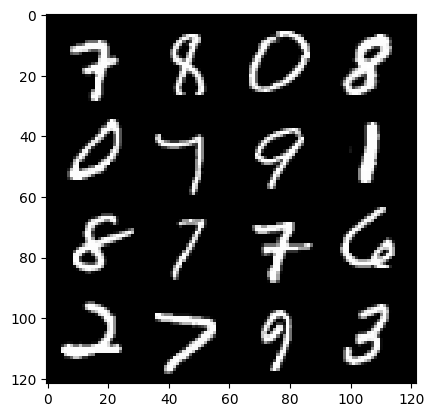

8: step 4200 / Gen loss: 5.575877285003658 / disc_loss: 0.021451113658646753


  0%|          | 0/469 [00:00<?, ?it/s]

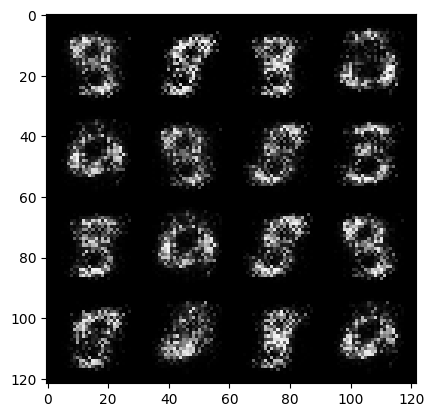

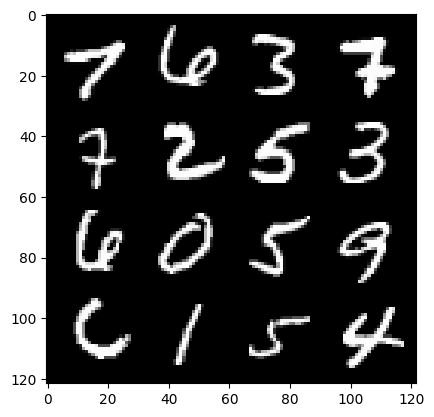

9: step 4500 / Gen loss: 5.964725394248962 / disc_loss: 0.020066477212434014


  0%|          | 0/469 [00:00<?, ?it/s]

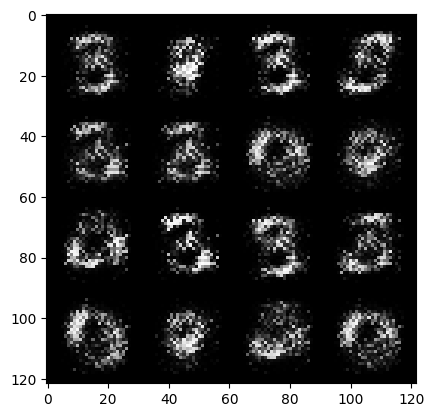

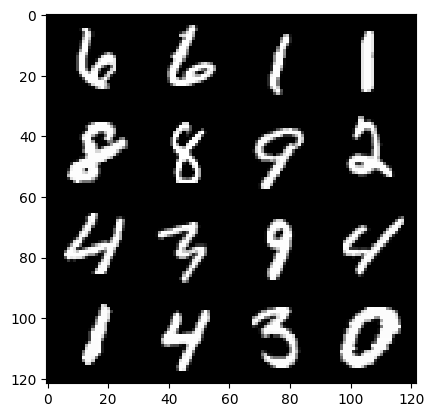

10: step 4800 / Gen loss: 6.069870309829712 / disc_loss: 0.018192710628112174


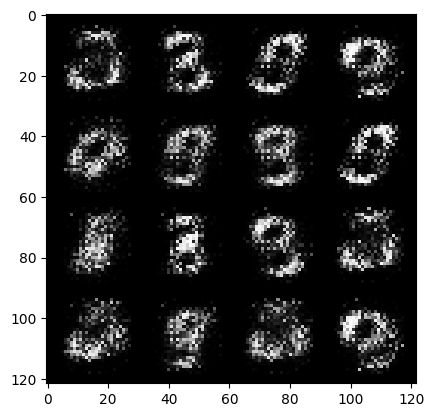

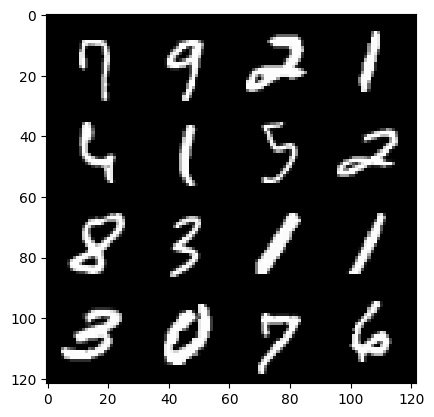

10: step 5100 / Gen loss: 6.338622713088992 / disc_loss: 0.014438170725479723


  0%|          | 0/469 [00:00<?, ?it/s]

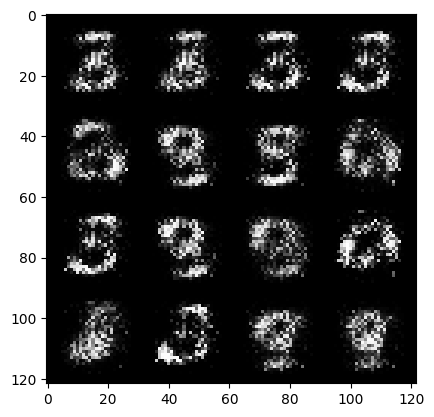

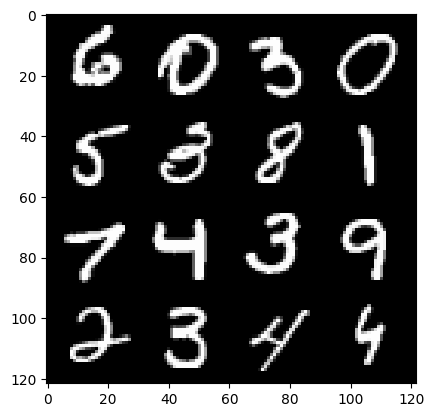

11: step 5400 / Gen loss: 6.611612645785015 / disc_loss: 0.011454292677032445


  0%|          | 0/469 [00:00<?, ?it/s]

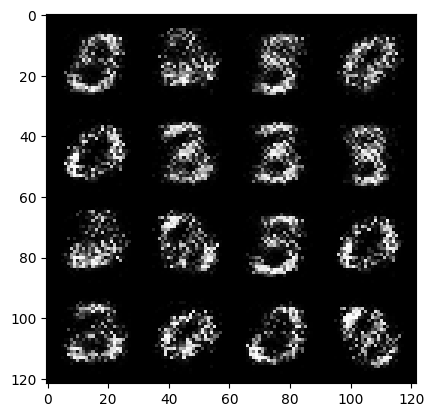

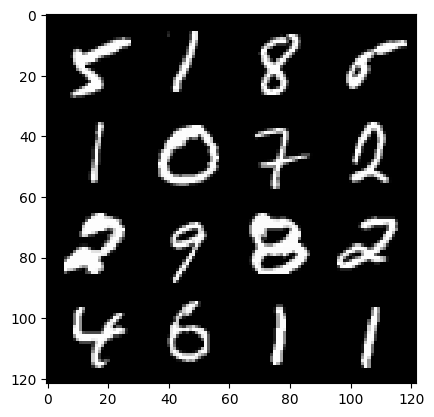

12: step 5700 / Gen loss: 6.711256041526794 / disc_loss: 0.009418217535130682


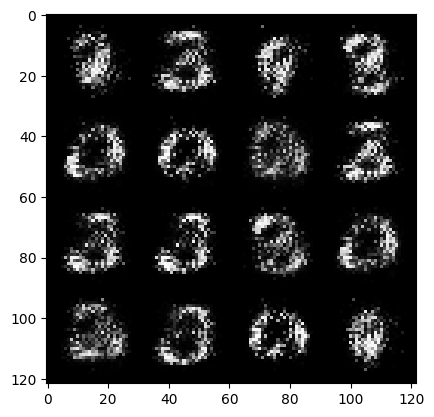

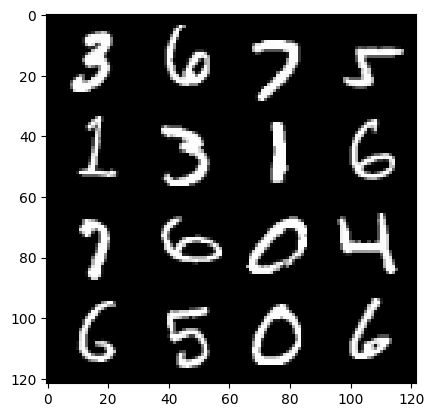

12: step 6000 / Gen loss: 6.783938976923619 / disc_loss: 0.00937438252692422


  0%|          | 0/469 [00:00<?, ?it/s]

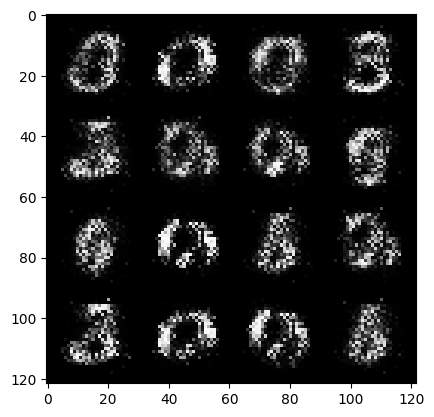

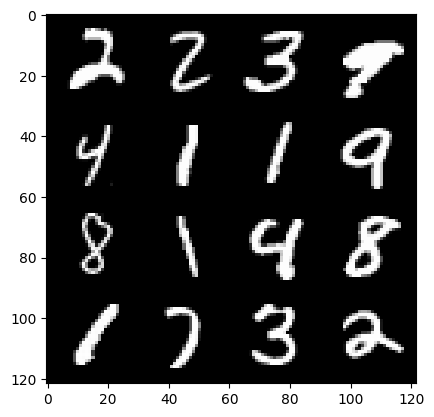

13: step 6300 / Gen loss: 7.3332812674840255 / disc_loss: 0.008726692779455333


  0%|          | 0/469 [00:00<?, ?it/s]

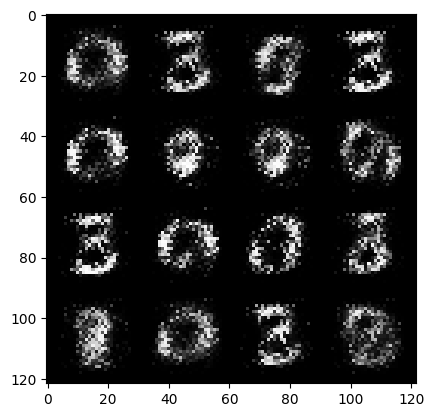

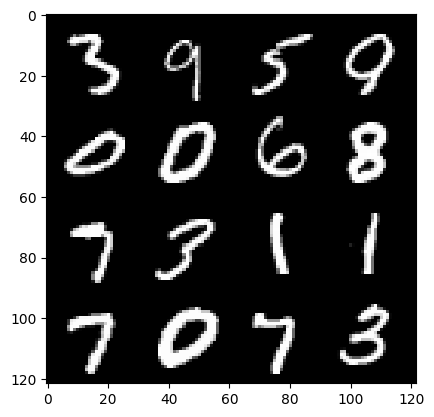

14: step 6600 / Gen loss: 7.282316776911415 / disc_loss: 0.009475175628904257


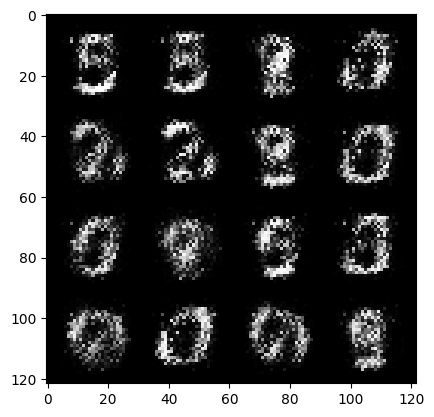

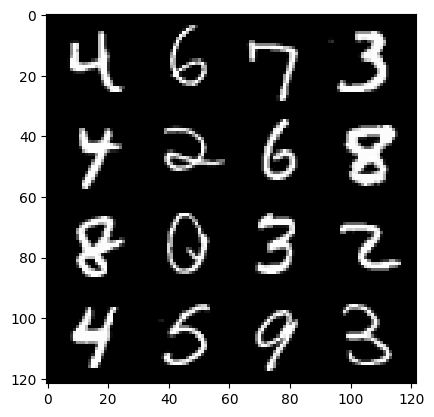

14: step 6900 / Gen loss: 7.010130446751912 / disc_loss: 0.012491446087757747


  0%|          | 0/469 [00:00<?, ?it/s]

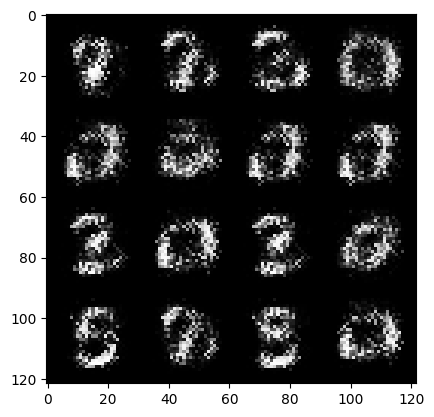

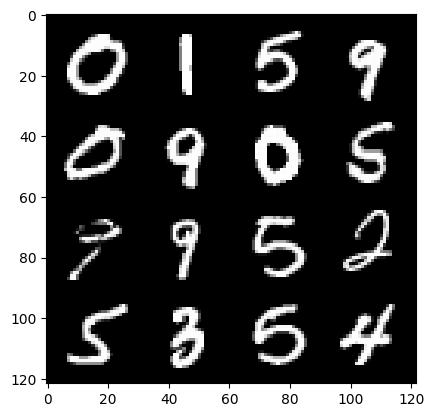

15: step 7200 / Gen loss: 6.645972622235611 / disc_loss: 0.01144053829057763


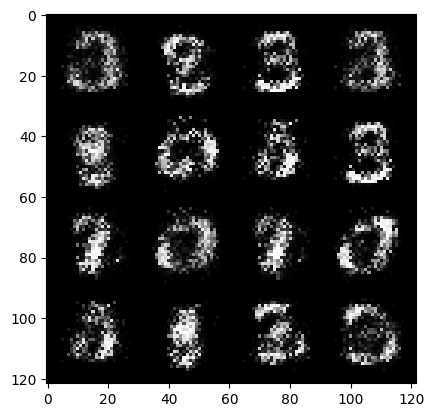

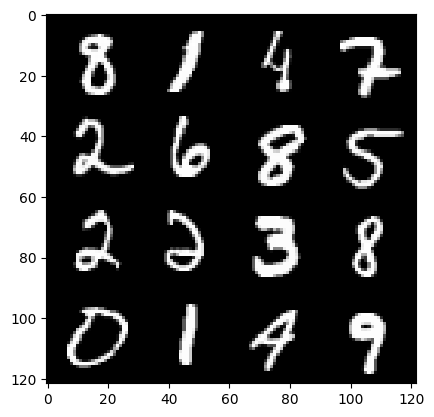

15: step 7500 / Gen loss: 7.0898932377497355 / disc_loss: 0.01051438751940926


  0%|          | 0/469 [00:00<?, ?it/s]

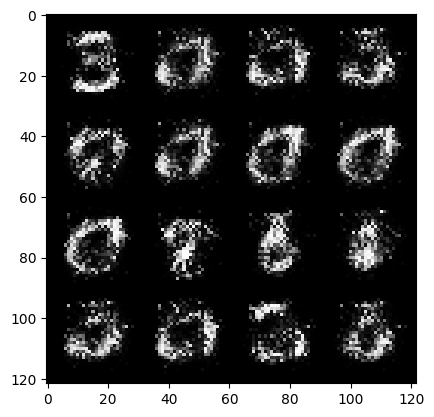

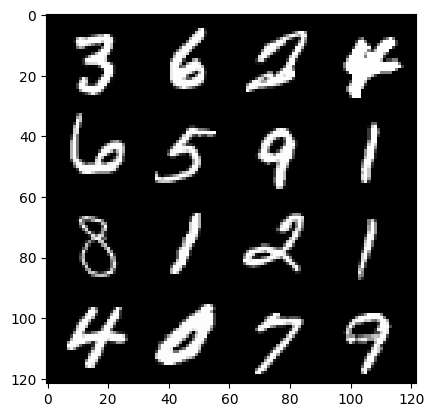

16: step 7800 / Gen loss: 7.499522396723427 / disc_loss: 0.01050061856163665


  0%|          | 0/469 [00:00<?, ?it/s]

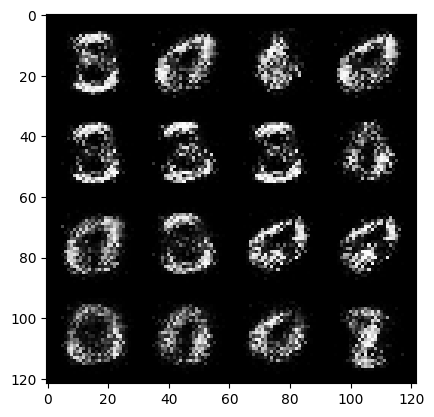

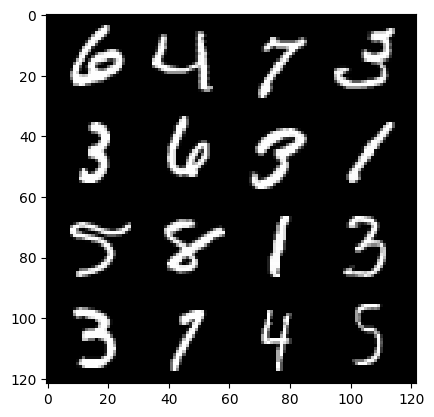

17: step 8100 / Gen loss: 7.643426235516869 / disc_loss: 0.008894100302519898


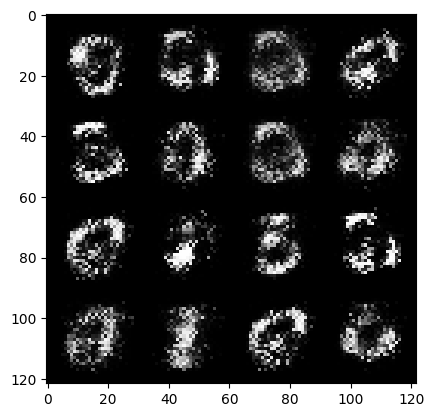

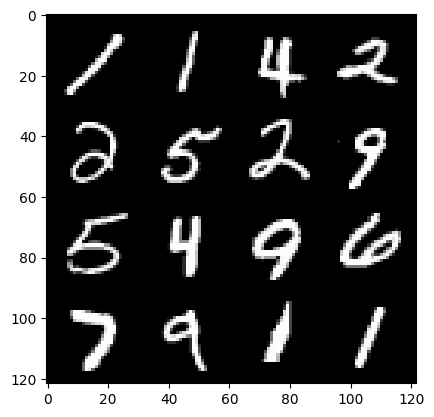

17: step 8400 / Gen loss: 7.545759124755858 / disc_loss: 0.008894965614114575


  0%|          | 0/469 [00:00<?, ?it/s]

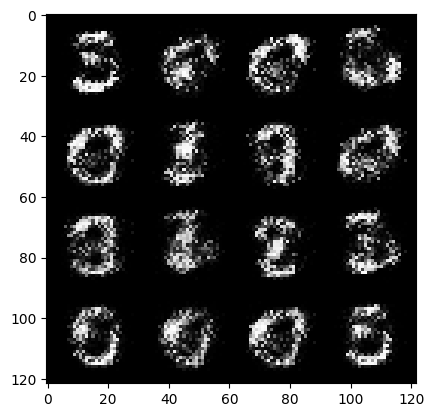

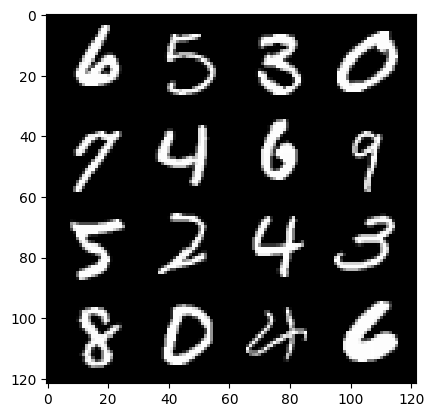

18: step 8700 / Gen loss: 7.688168061574298 / disc_loss: 0.008504841458828499


  0%|          | 0/469 [00:00<?, ?it/s]

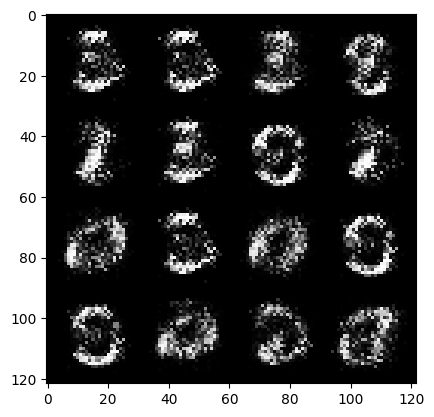

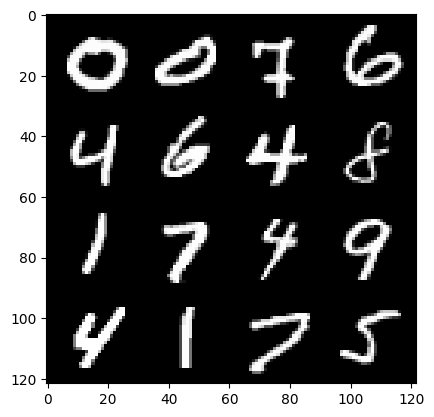

19: step 9000 / Gen loss: 7.37083937803904 / disc_loss: 0.007910227489192035


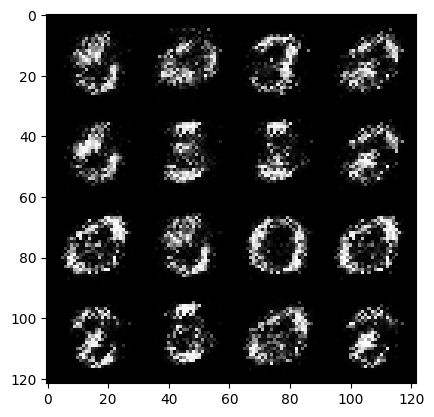

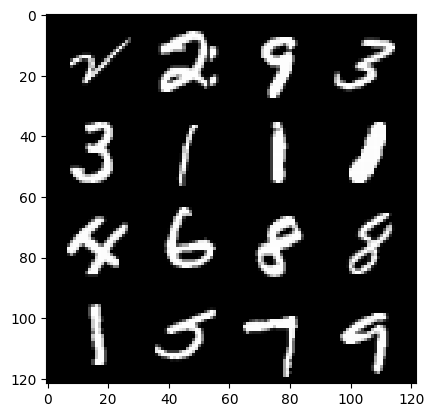

19: step 9300 / Gen loss: 7.636671272913615 / disc_loss: 0.009980092603558048


  0%|          | 0/469 [00:00<?, ?it/s]

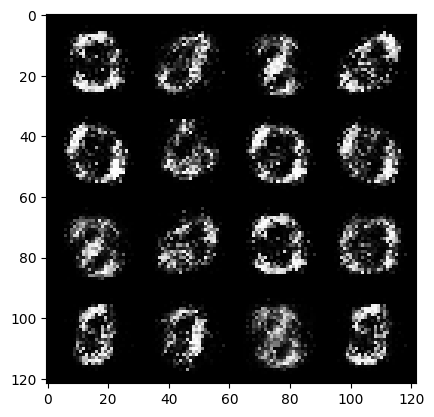

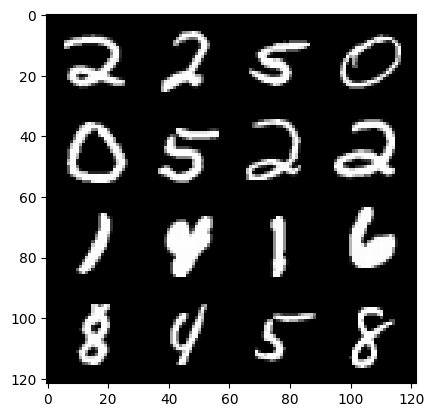

20: step 9600 / Gen loss: 8.095093857447303 / disc_loss: 0.014494446041062474


  0%|          | 0/469 [00:00<?, ?it/s]

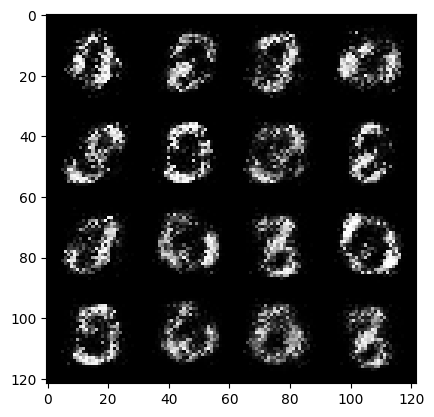

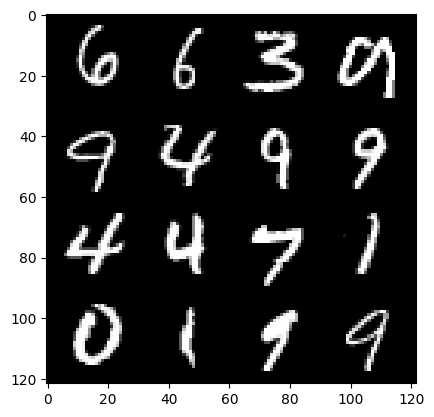

21: step 9900 / Gen loss: 8.197446858088178 / disc_loss: 0.015677039346968135


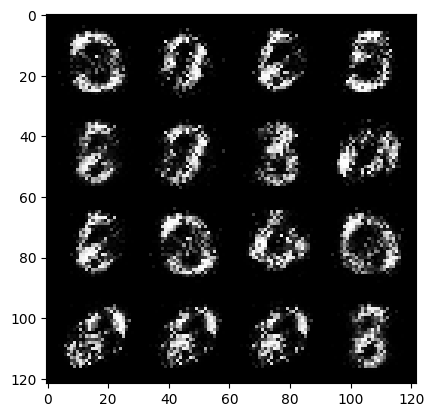

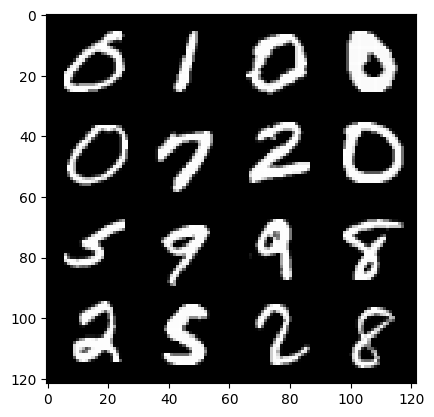

21: step 10200 / Gen loss: 7.112972985903424 / disc_loss: 0.015501452403453483


  0%|          | 0/469 [00:00<?, ?it/s]

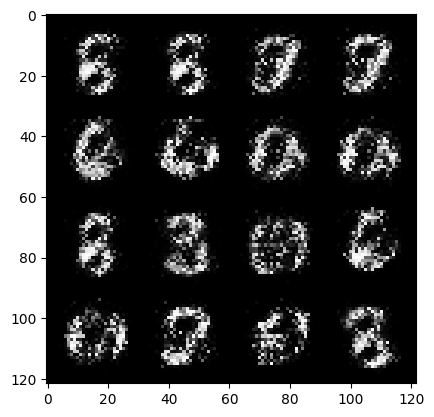

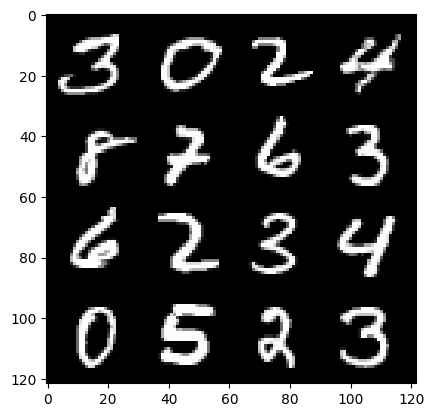

22: step 10500 / Gen loss: 6.978115458488465 / disc_loss: 0.011391184502281255


  0%|          | 0/469 [00:00<?, ?it/s]

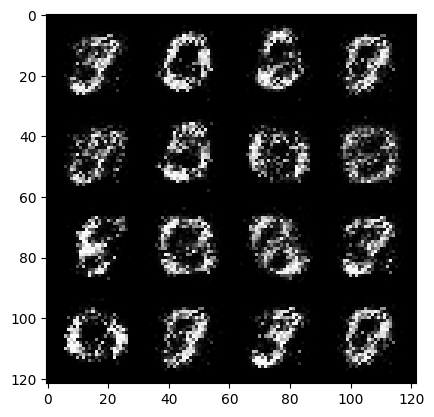

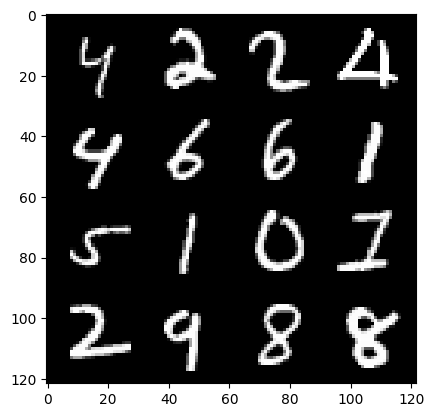

23: step 10800 / Gen loss: 7.596495329538978 / disc_loss: 0.009846830744839583


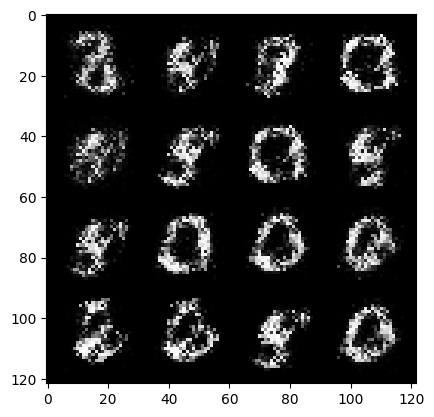

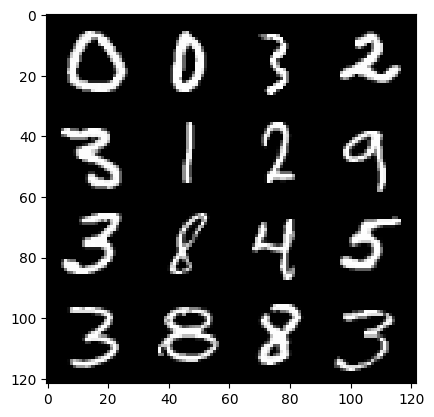

23: step 11100 / Gen loss: 7.961109387079872 / disc_loss: 0.010103541815963889


  0%|          | 0/469 [00:00<?, ?it/s]

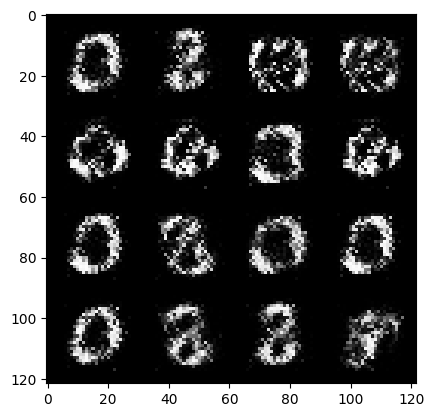

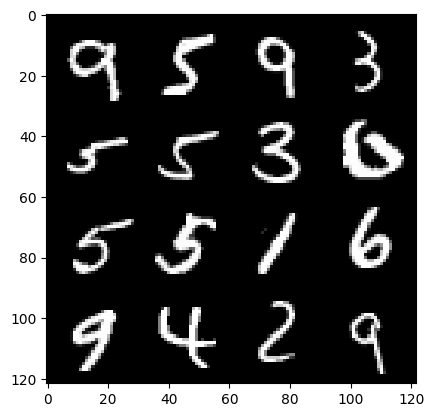

24: step 11400 / Gen loss: 7.5737367089589425 / disc_loss: 0.011080503818035745


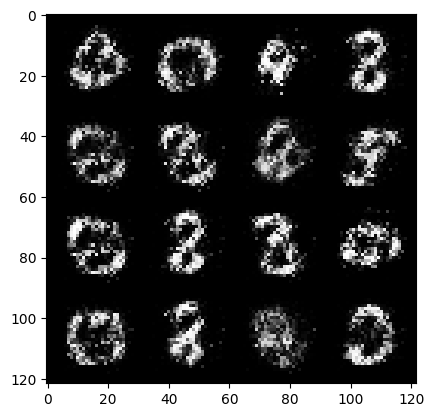

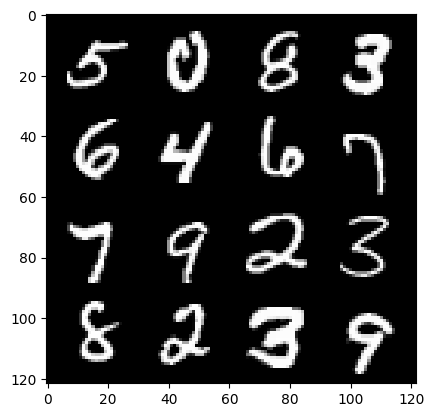

24: step 11700 / Gen loss: 7.576974455515545 / disc_loss: 0.010651668244972825


  0%|          | 0/469 [00:00<?, ?it/s]

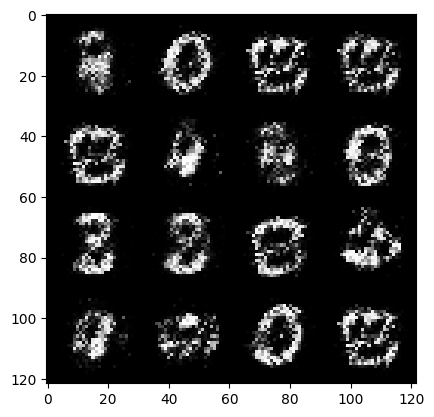

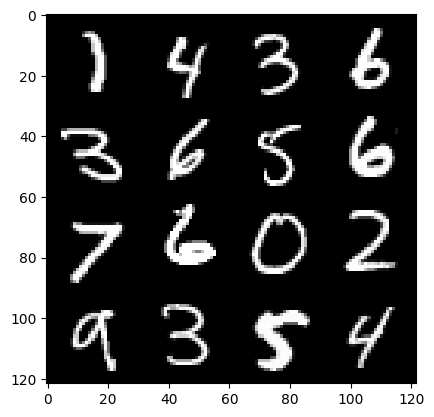

25: step 12000 / Gen loss: 7.441591963768004 / disc_loss: 0.012859096593068298


  0%|          | 0/469 [00:00<?, ?it/s]

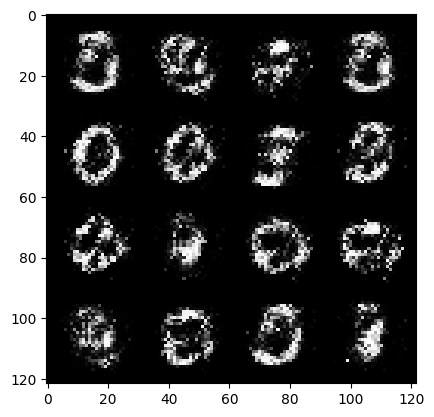

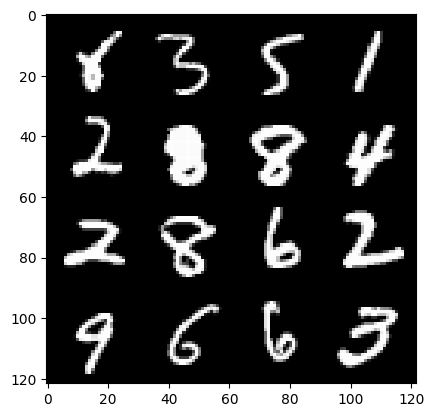

26: step 12300 / Gen loss: 7.253094288508101 / disc_loss: 0.011162713383479655


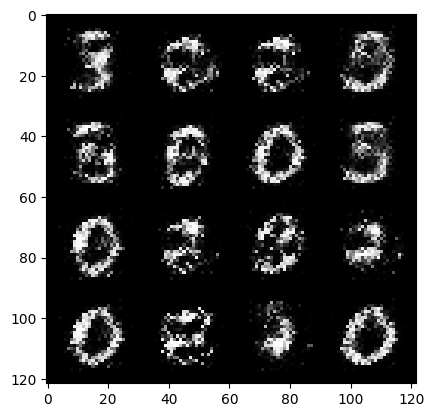

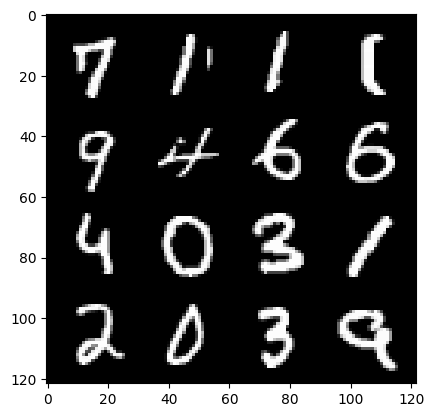

26: step 12600 / Gen loss: 6.974172773361204 / disc_loss: 0.01339713965154563


  0%|          | 0/469 [00:00<?, ?it/s]

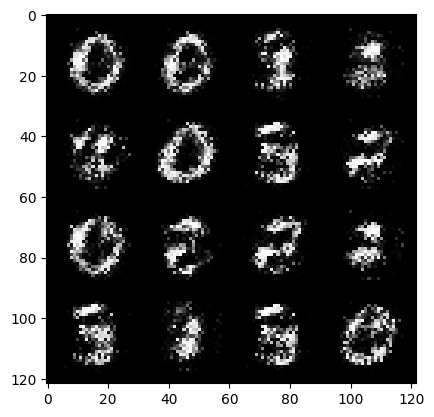

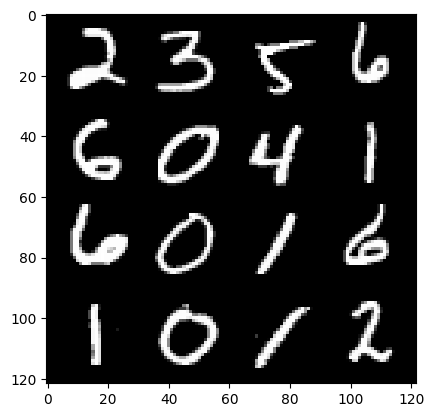

27: step 12900 / Gen loss: 7.308204565048221 / disc_loss: 0.010682200454175466


  0%|          | 0/469 [00:00<?, ?it/s]

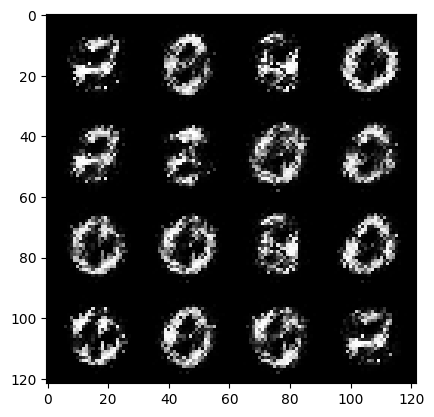

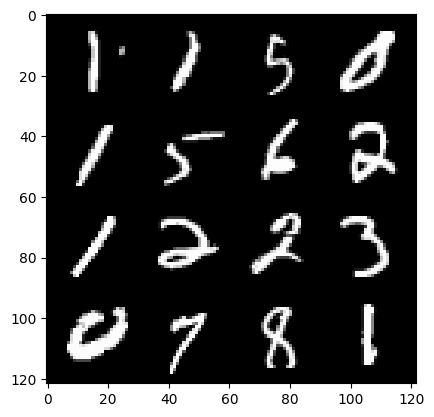

28: step 13200 / Gen loss: 7.116808962821958 / disc_loss: 0.013164924600084008


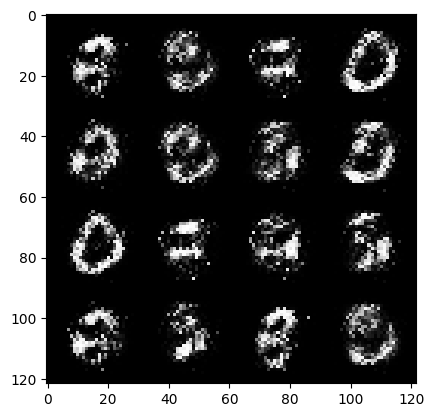

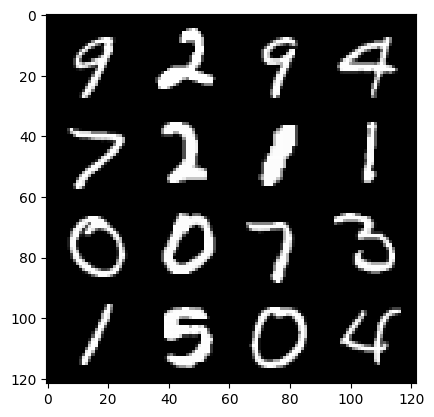

28: step 13500 / Gen loss: 6.772301747004192 / disc_loss: 0.017614703642514853


  0%|          | 0/469 [00:00<?, ?it/s]

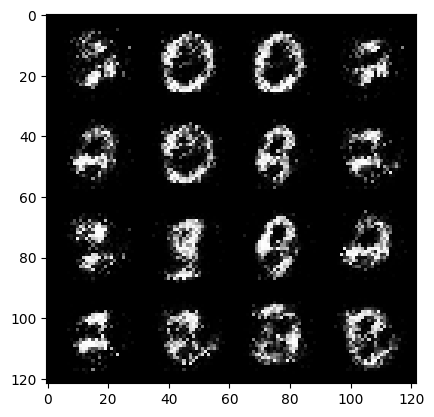

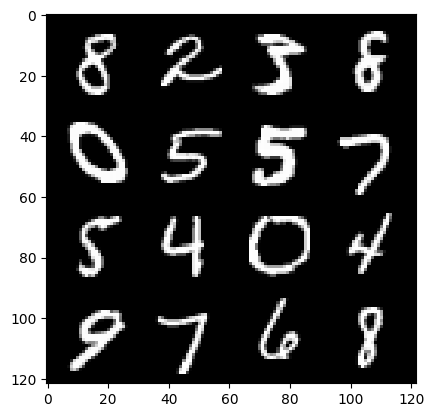

29: step 13800 / Gen loss: 7.173690919876096 / disc_loss: 0.012965626337099816


  0%|          | 0/469 [00:00<?, ?it/s]

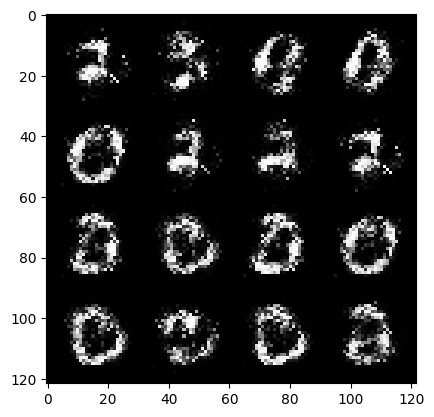

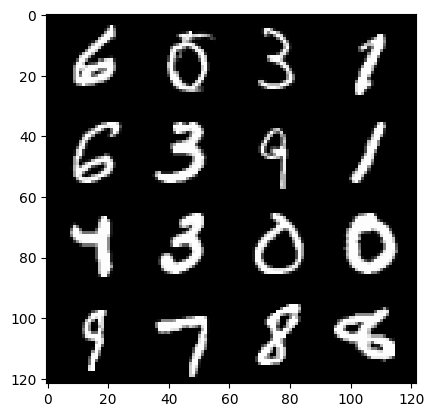

30: step 14100 / Gen loss: 6.909960265159605 / disc_loss: 0.011704126821908486


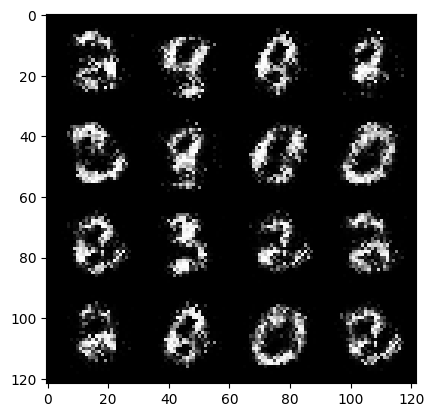

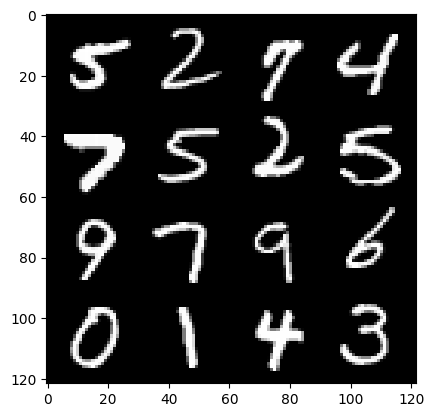

30: step 14400 / Gen loss: 7.008173990249632 / disc_loss: 0.011018945508791744


  0%|          | 0/469 [00:00<?, ?it/s]

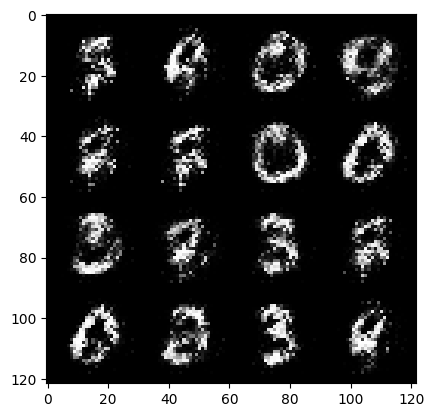

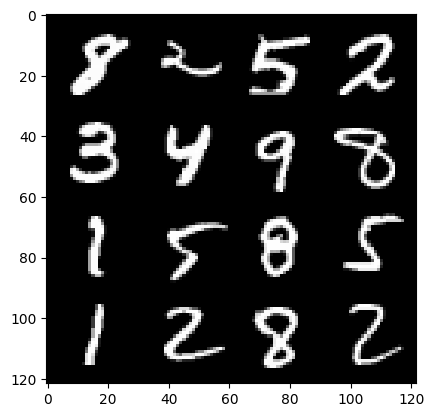

31: step 14700 / Gen loss: 7.25013147672017 / disc_loss: 0.011056214954005559


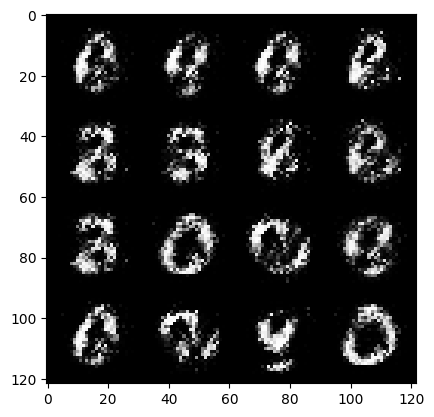

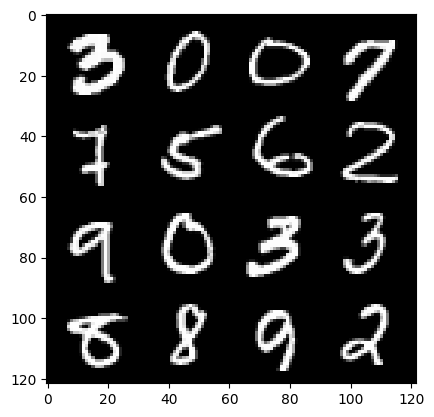

31: step 15000 / Gen loss: 6.566119669278468 / disc_loss: 0.01499688859796151


  0%|          | 0/469 [00:00<?, ?it/s]

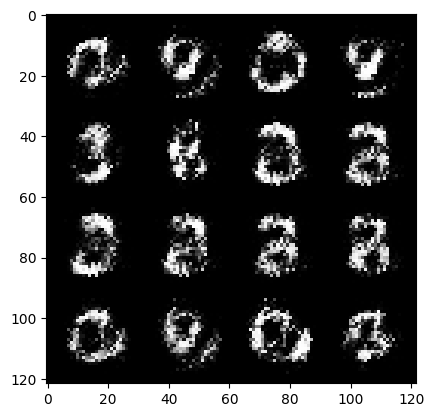

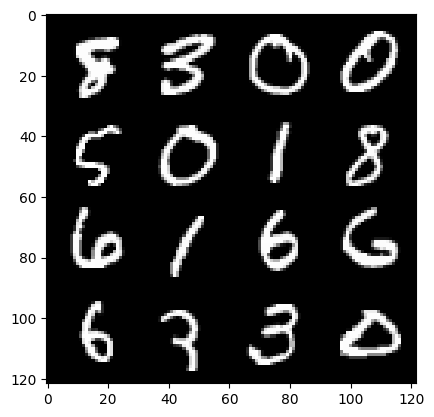

32: step 15300 / Gen loss: 6.815829105377197 / disc_loss: 0.017730993280808134


  0%|          | 0/469 [00:00<?, ?it/s]

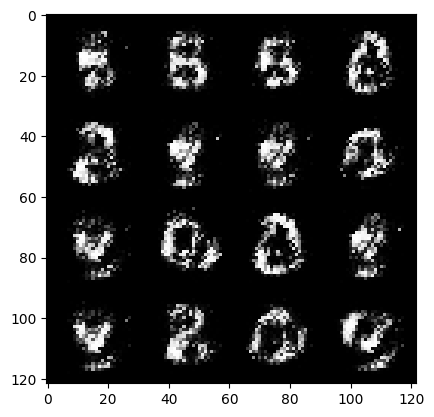

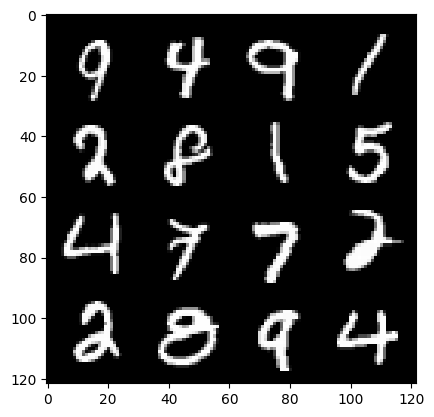

33: step 15600 / Gen loss: 7.001822134653725 / disc_loss: 0.01628506557705501


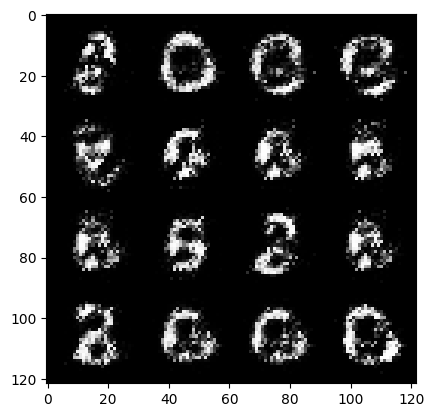

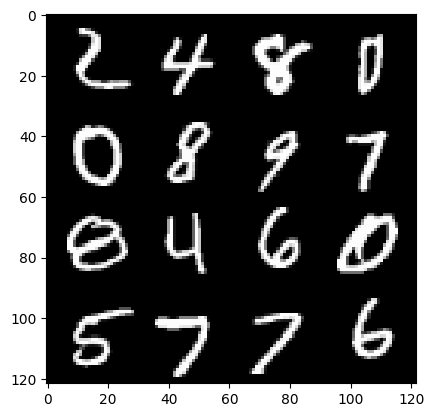

33: step 15900 / Gen loss: 7.23449223995209 / disc_loss: 0.018821585689826552


  0%|          | 0/469 [00:00<?, ?it/s]

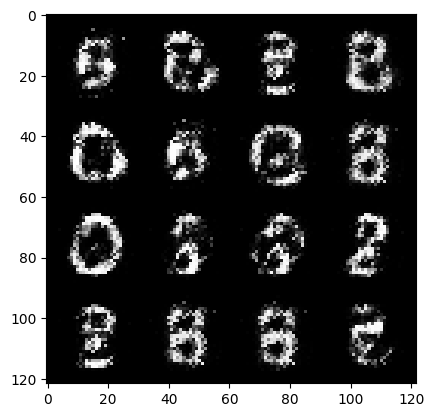

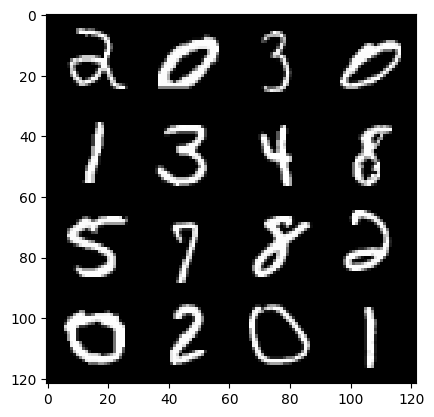

34: step 16200 / Gen loss: 6.820350559552516 / disc_loss: 0.018412590109122294


  0%|          | 0/469 [00:00<?, ?it/s]

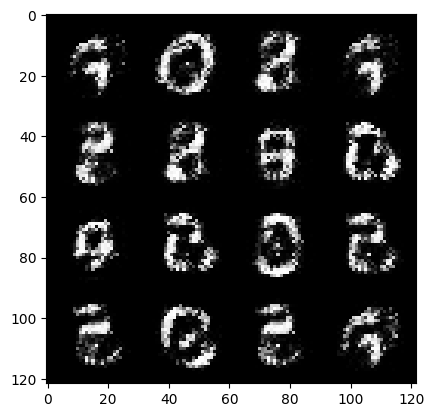

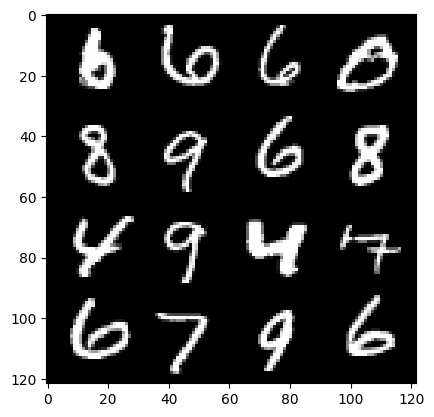

35: step 16500 / Gen loss: 6.762147175470992 / disc_loss: 0.01870564325479792


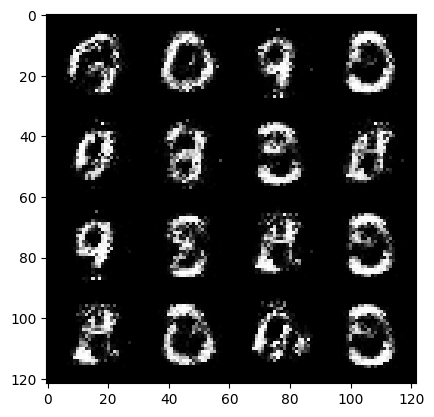

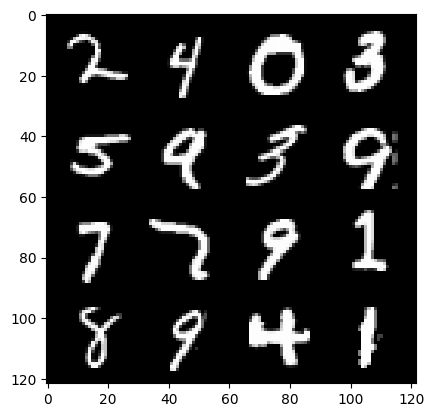

35: step 16800 / Gen loss: 6.786914086341858 / disc_loss: 0.01771924638111766


  0%|          | 0/469 [00:00<?, ?it/s]

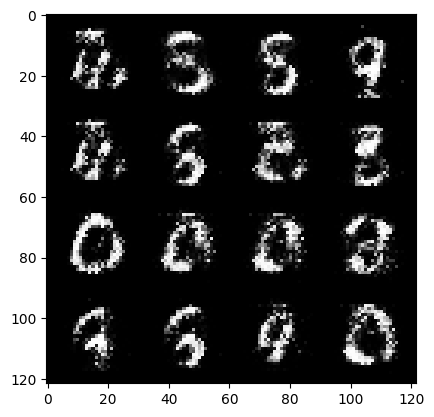

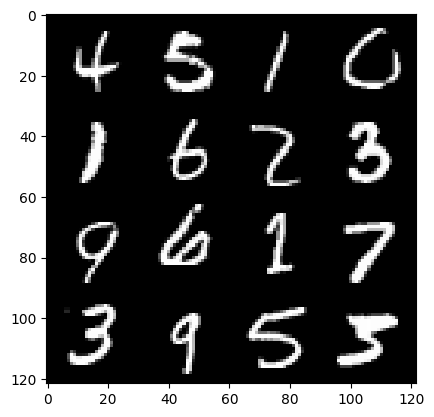

36: step 17100 / Gen loss: 6.857486599286402 / disc_loss: 0.02105373113648967


  0%|          | 0/469 [00:00<?, ?it/s]

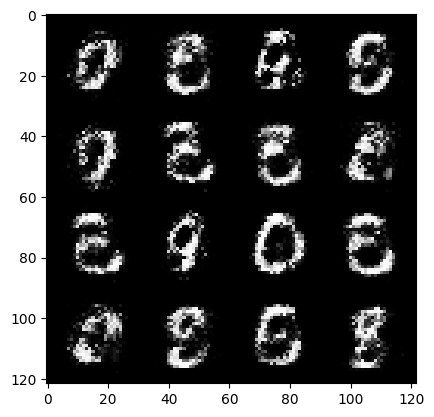

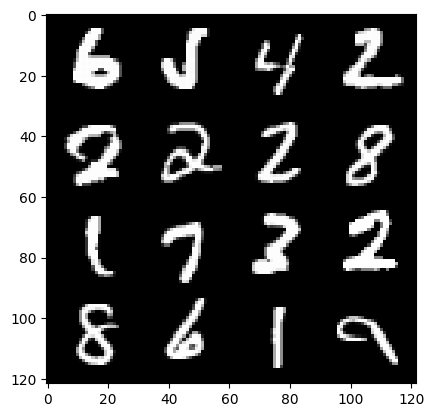

37: step 17400 / Gen loss: 6.710921692848212 / disc_loss: 0.02465753860150774


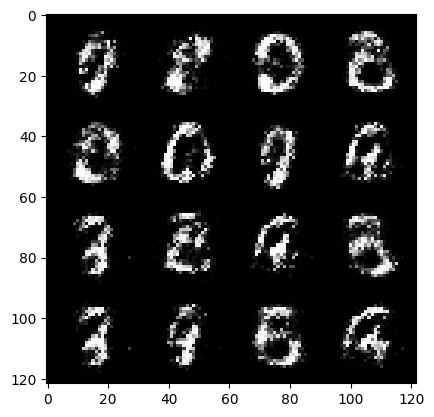

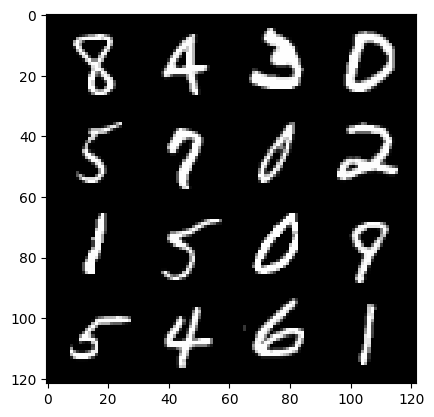

37: step 17700 / Gen loss: 6.3060022465388 / disc_loss: 0.028457396092514176


  0%|          | 0/469 [00:00<?, ?it/s]

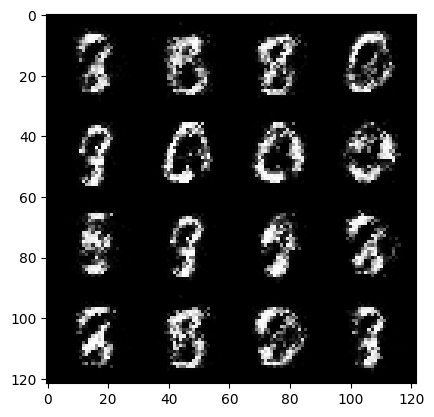

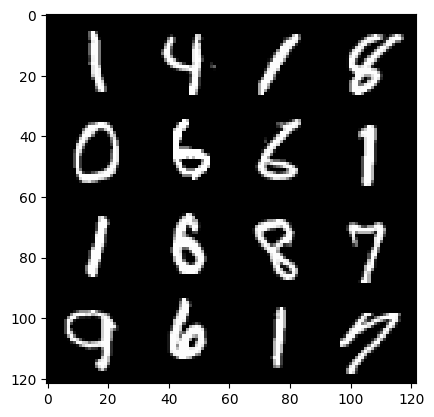

38: step 18000 / Gen loss: 6.397384778658548 / disc_loss: 0.025786115899682046


  0%|          | 0/469 [00:00<?, ?it/s]

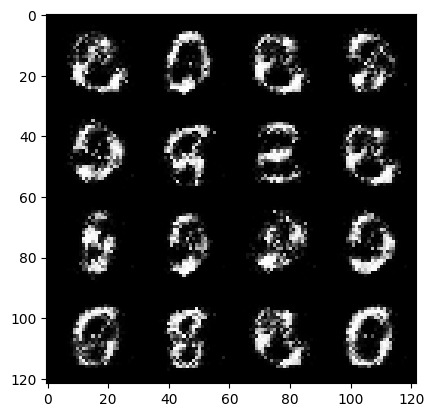

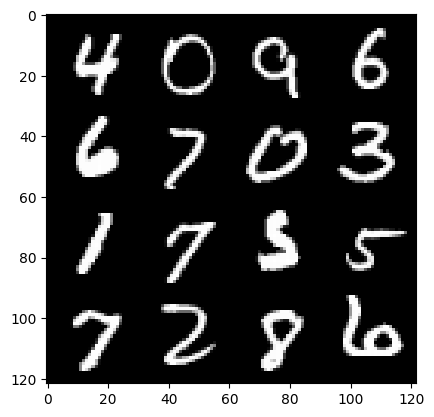

39: step 18300 / Gen loss: 6.3480520184834806 / disc_loss: 0.028221316489701487


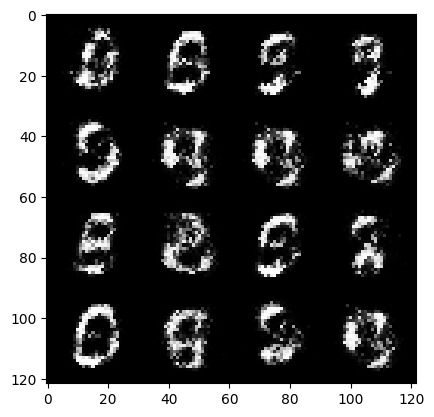

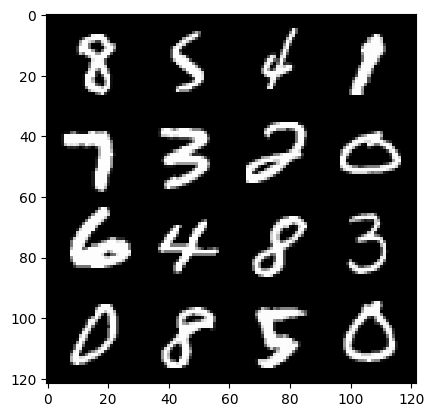

39: step 18600 / Gen loss: 6.244752793312073 / disc_loss: 0.03528866926984241


  0%|          | 0/469 [00:00<?, ?it/s]

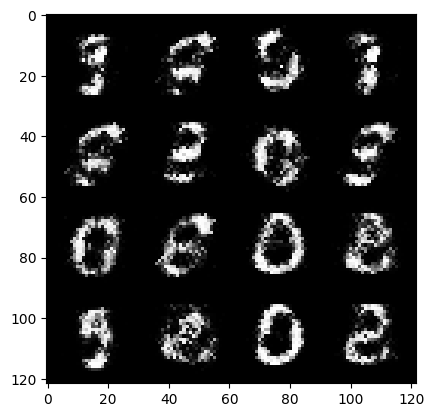

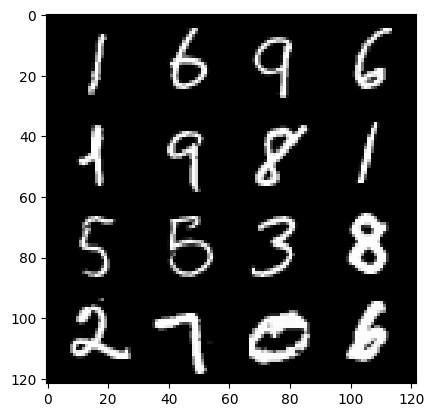

40: step 18900 / Gen loss: 6.0335209719339975 / disc_loss: 0.03800666628095009


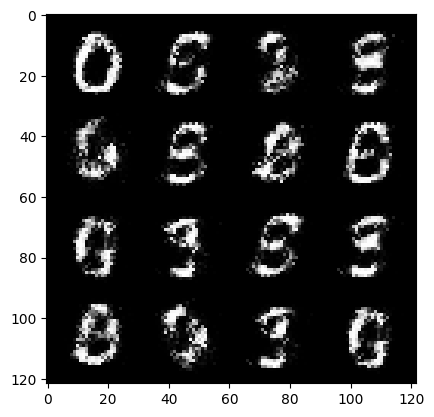

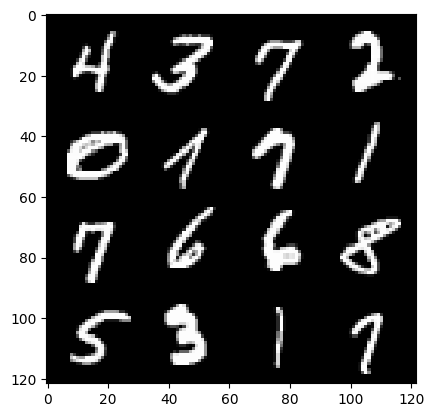

40: step 19200 / Gen loss: 6.132726419766747 / disc_loss: 0.029170145623696322


  0%|          | 0/469 [00:00<?, ?it/s]

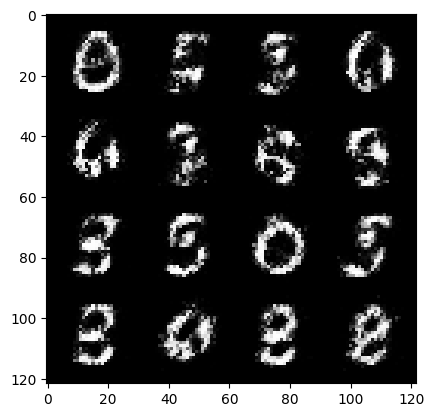

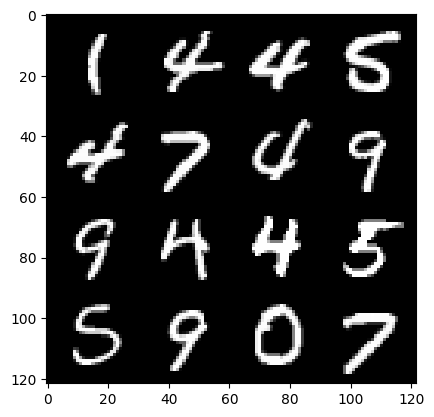

41: step 19500 / Gen loss: 5.780085806846623 / disc_loss: 0.03697980074832837


  0%|          | 0/469 [00:00<?, ?it/s]

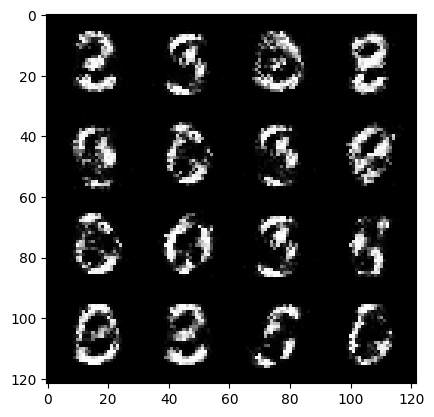

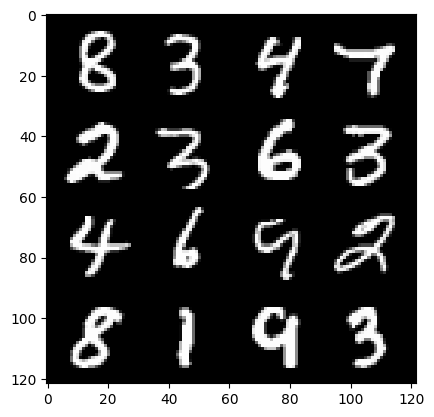

42: step 19800 / Gen loss: 5.442365584373476 / disc_loss: 0.04713019550467529


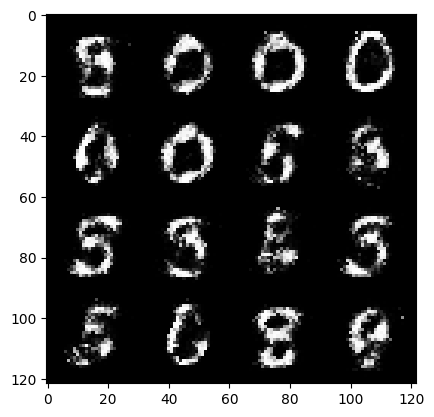

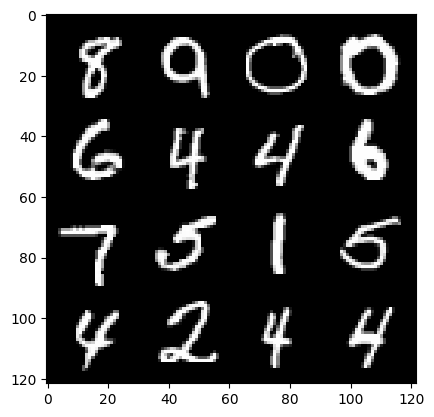

42: step 20100 / Gen loss: 5.738794740041096 / disc_loss: 0.041423699641600246


  0%|          | 0/469 [00:00<?, ?it/s]

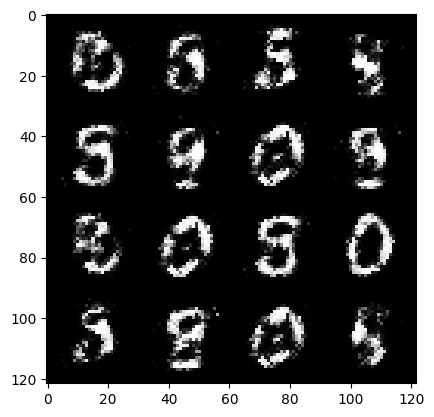

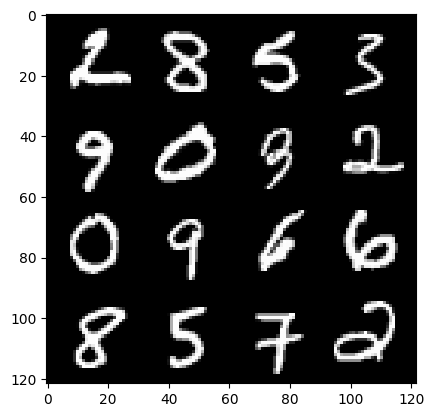

43: step 20400 / Gen loss: 5.6279301579793355 / disc_loss: 0.04811623428327342


  0%|          | 0/469 [00:00<?, ?it/s]

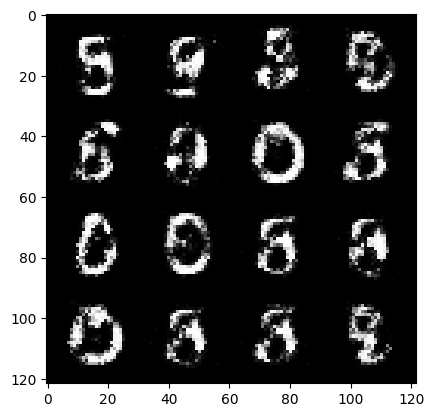

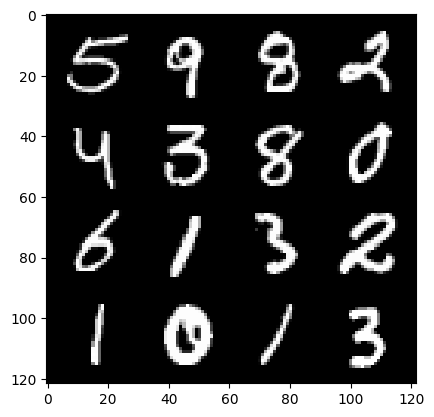

44: step 20700 / Gen loss: 5.418428079287211 / disc_loss: 0.04583889584988356


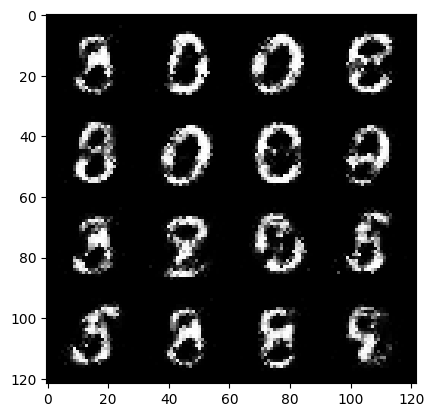

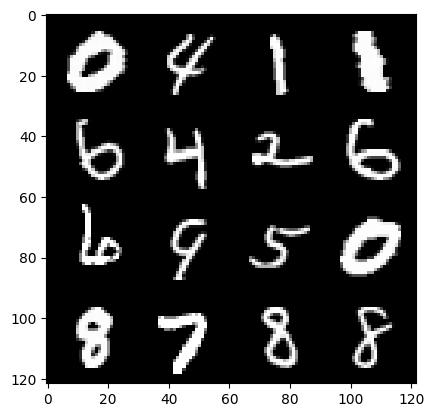

44: step 21000 / Gen loss: 5.788882184028628 / disc_loss: 0.041763650073359394


  0%|          | 0/469 [00:00<?, ?it/s]

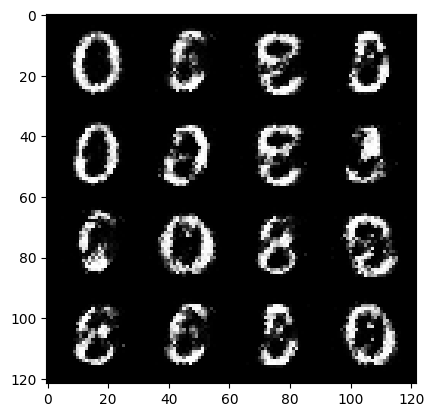

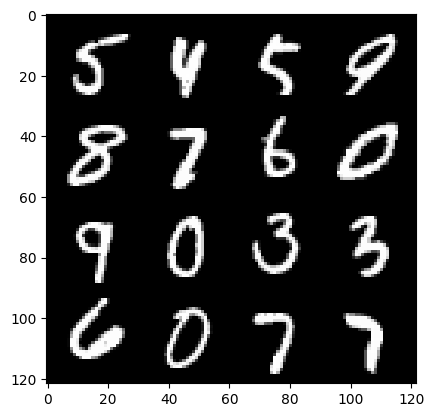

45: step 21300 / Gen loss: 5.679478451410927 / disc_loss: 0.04184964953611291


  0%|          | 0/469 [00:00<?, ?it/s]

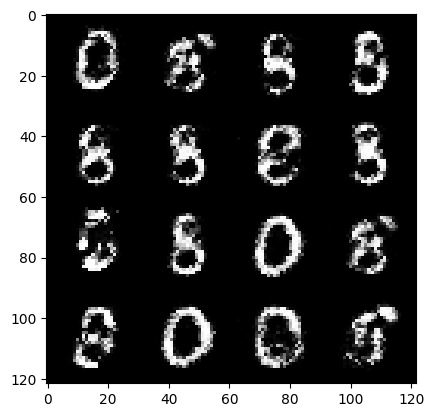

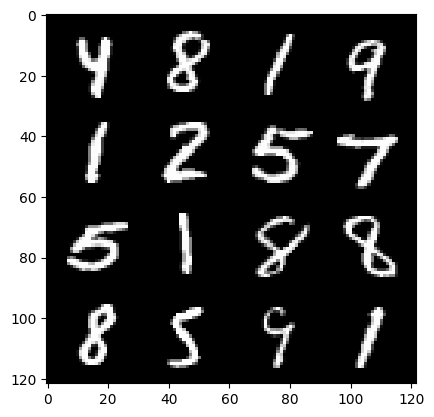

46: step 21600 / Gen loss: 5.273809902667999 / disc_loss: 0.052023267814268706


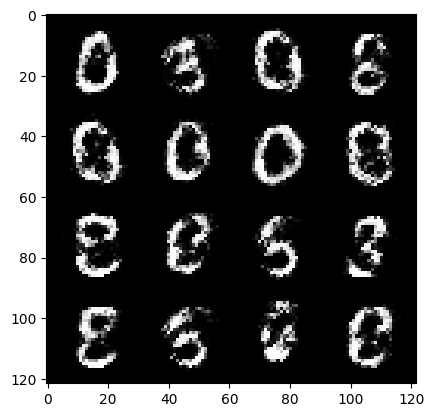

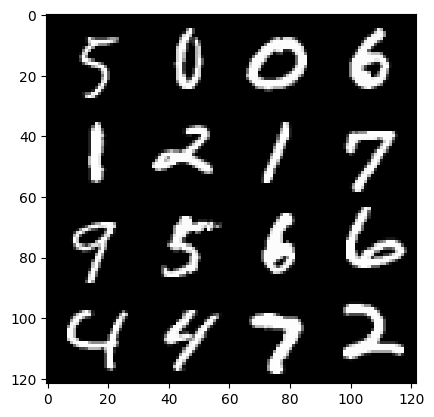

46: step 21900 / Gen loss: 5.224228053092957 / disc_loss: 0.05584056229020159


  0%|          | 0/469 [00:00<?, ?it/s]

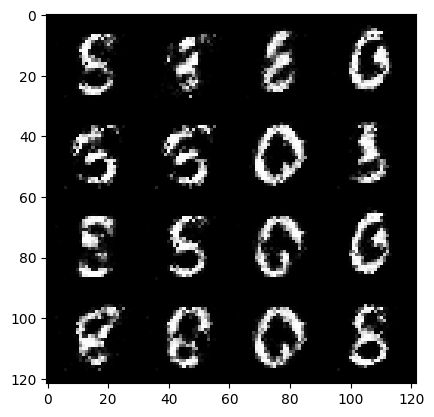

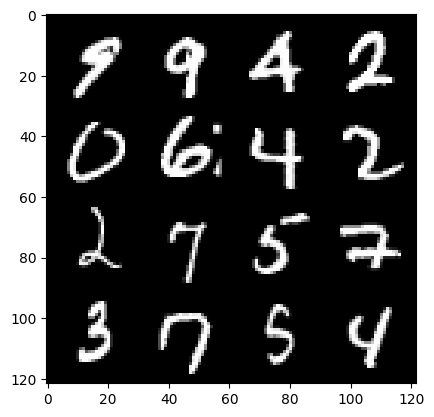

47: step 22200 / Gen loss: 5.211269772847496 / disc_loss: 0.050505787907168254


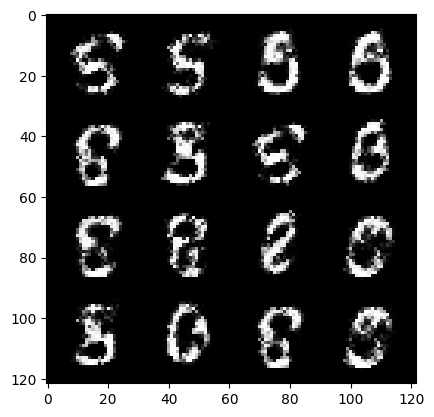

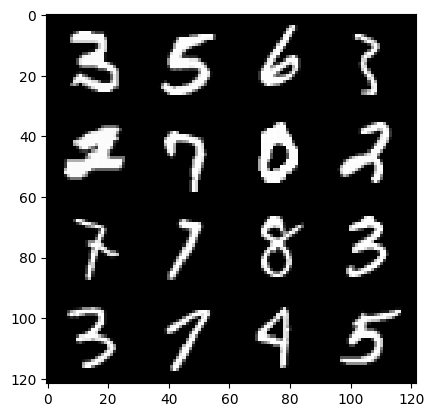

47: step 22500 / Gen loss: 5.460480848948163 / disc_loss: 0.05066891074335822


  0%|          | 0/469 [00:00<?, ?it/s]

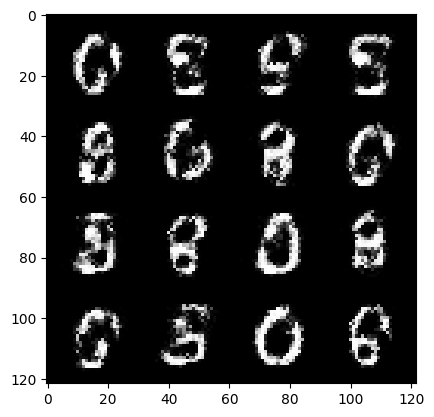

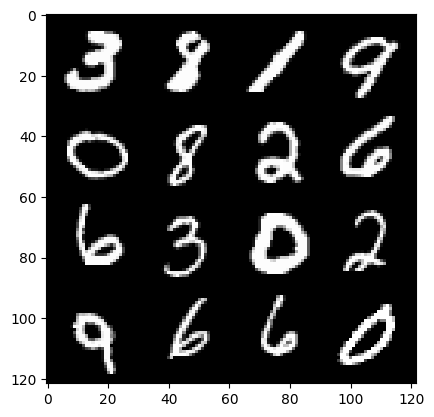

48: step 22800 / Gen loss: 5.5810521443684875 / disc_loss: 0.06315556909888985


  0%|          | 0/469 [00:00<?, ?it/s]

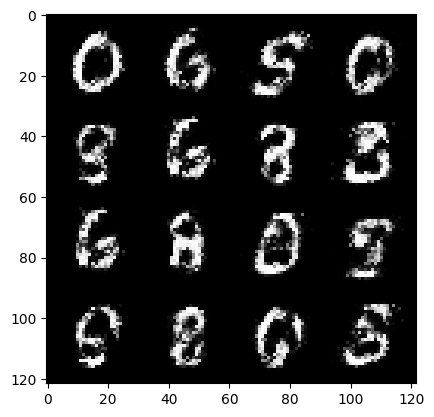

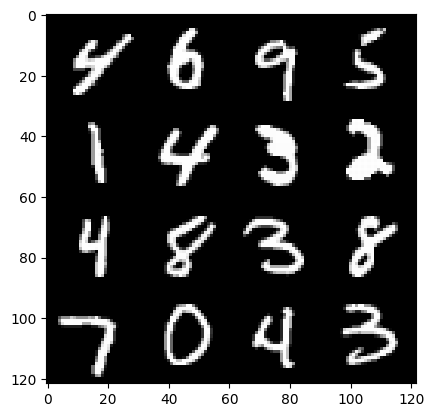

49: step 23100 / Gen loss: 5.530462967554728 / disc_loss: 0.060251641056189936


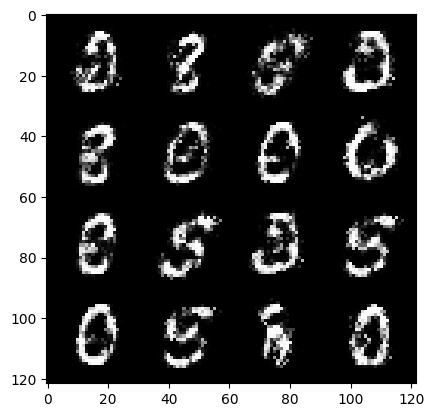

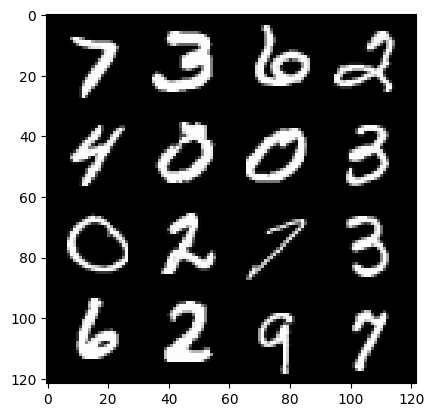

49: step 23400 / Gen loss: 5.635442221959432 / disc_loss: 0.05646541197473806


  0%|          | 0/469 [00:00<?, ?it/s]

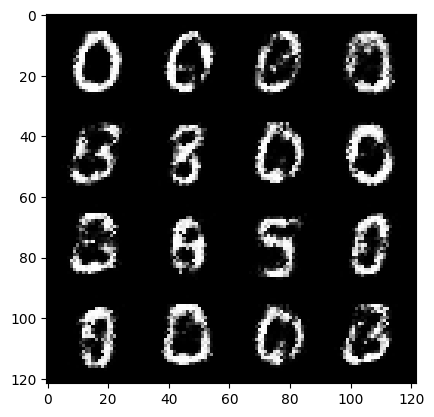

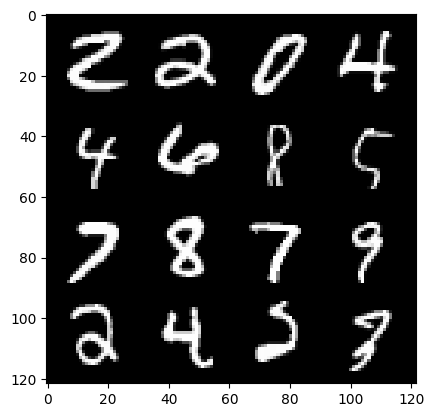

50: step 23700 / Gen loss: 5.57538135051727 / disc_loss: 0.05742739375370243


  0%|          | 0/469 [00:00<?, ?it/s]

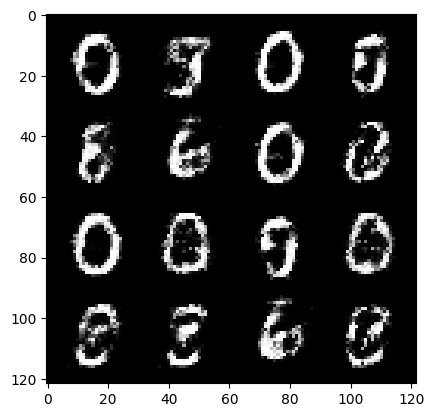

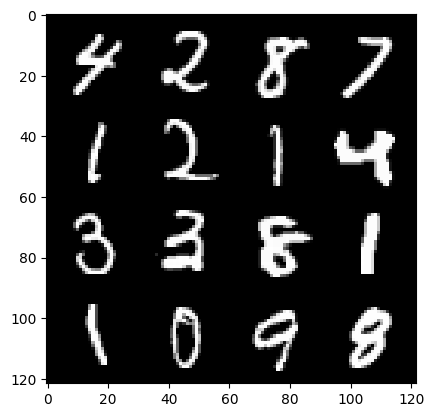

51: step 24000 / Gen loss: 5.0978055270512845 / disc_loss: 0.07299534614508357


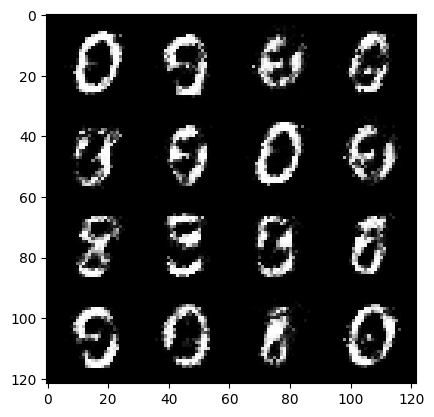

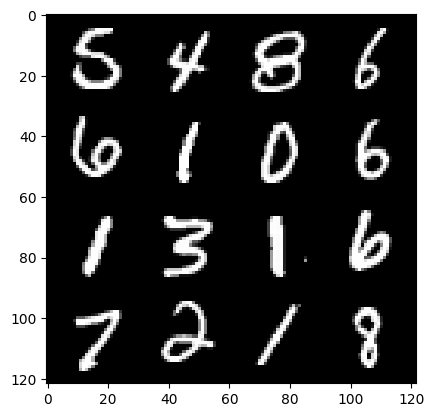

51: step 24300 / Gen loss: 5.044039947191881 / disc_loss: 0.08378953459362191


  0%|          | 0/469 [00:00<?, ?it/s]

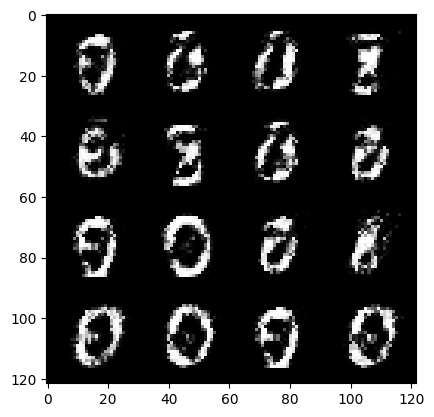

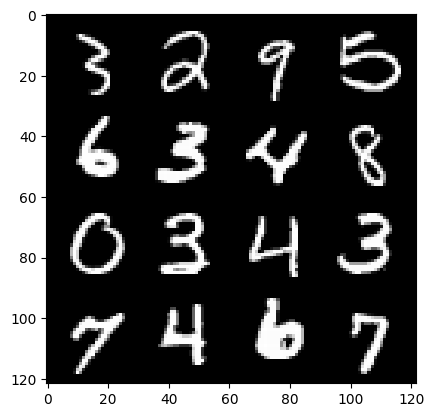

52: step 24600 / Gen loss: 5.048340179125463 / disc_loss: 0.0745760545320809


  0%|          | 0/469 [00:00<?, ?it/s]

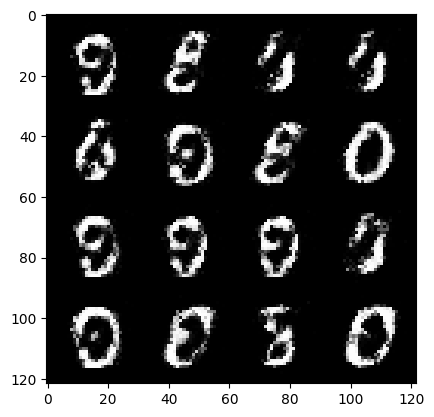

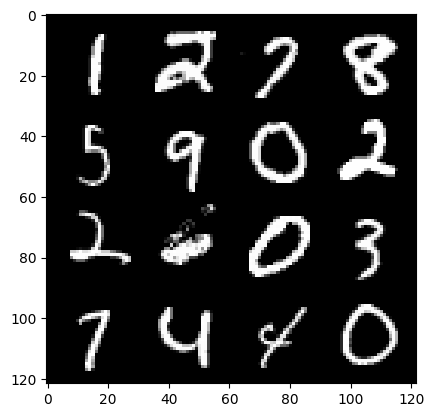

53: step 24900 / Gen loss: 5.286265330314639 / disc_loss: 0.06819544982475545


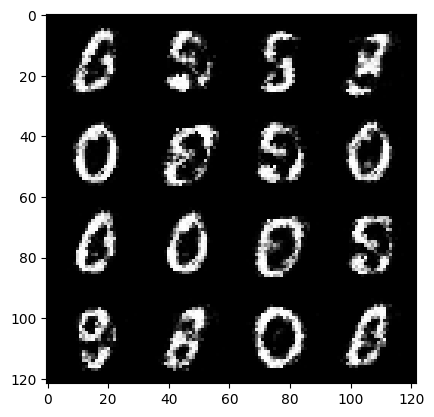

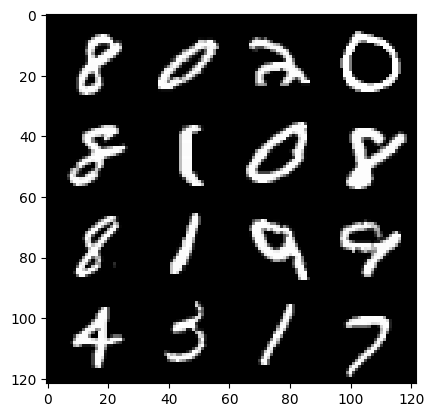

53: step 25200 / Gen loss: 5.052379336357108 / disc_loss: 0.07974457773069535


  0%|          | 0/469 [00:00<?, ?it/s]

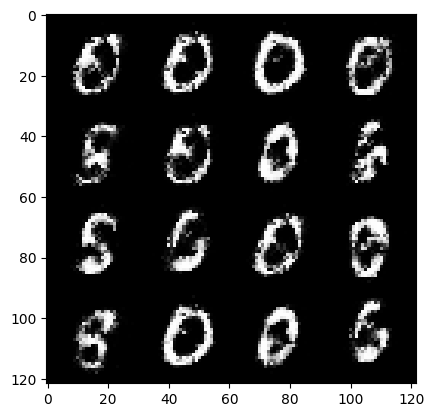

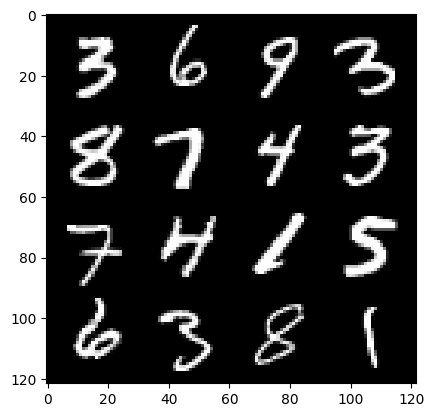

54: step 25500 / Gen loss: 4.895056144396461 / disc_loss: 0.08284852297976616


In [ ]:
### 60000 /128 = 468.75 steps in each epoch
### each step is going to process 128 images = size of the batch (except the last step)

for epoch in range(epochs):
  for real, _ in tqdm(dataloader):
    ### discriminator
    disc_opt.zero_grad()

    cur_bs=len(real) #real: 128 * 1 * 28 *28
    real = real.view(cur_bs, -1) # 128 * 784
    real = real.to(device)

    disc_loss = calc_disc_loss(loss_func,gen,disc,cur_bs,real,z_dim)

    disc_loss.backward(retain_graph=True)
    disc_opt.step()

    ### generator
    gen_opt.zero_grad()
    gen_loss = calc_gen_loss(loss_func,gen,disc,cur_bs,z_dim)
    gen_loss.backward(retain_graph=True)
    gen_opt.step()

    ###visualization & stats
    mean_disc_loss+=disc_loss.item()/info_step
    mean_gen_loss+=gen_loss.item()/info_step


    if cur_step % info_step == 0 and cur_step>0:
      fake_noise = gen_noise(cur_bs, z_dim)
      fake = gen(fake_noise)
      show(fake)
      show(real)
      print(f"{epoch}: step {cur_step} / Gen loss: {mean_gen_loss} / disc_loss: {mean_disc_loss}")
      mean_gen_loss, mean_disc_loss =0,0
    cur_step+=1